<a href="https://colab.research.google.com/github/Rijwan94/Machine_Learning/blob/main/ML_Case_Study_eurusd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Case Study**
##(Banking & Financial Services - Algorithmic Trading - Time Series Forecasting/Reinforcement Learning - Sharpe Ratio/Profit and Loss)

###***Rijwan Shaikh***
Runtime = 30 Min

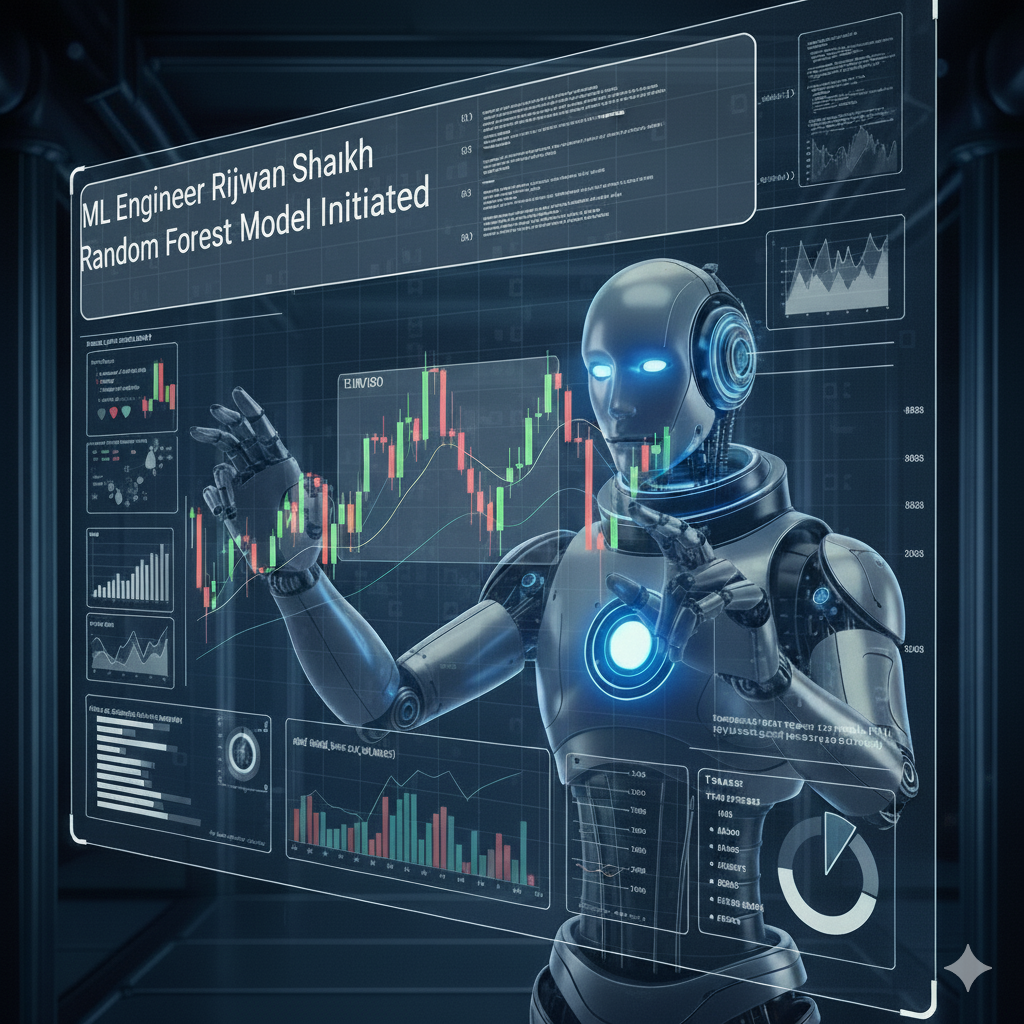

GitHub Link: https://github.com/Rijwan94/Machine_Learning/blob/main/ML_Case_Study_eurusd.ipynb

HTML Page: https://rijwan94.github.io/Machine_Learning/ml_case_study_eurusd.html


#**Start**

##**Problem Statement**

The project addresses the challenge of accurately predicting short-term market trends for a fixed-duration binary trading strategy. The objective is to develop a machine learning model that can analyze historical data for the EUR/USD currency pair to predict two key outcomes: the direction (up or down) of the price movement and whether that trend will persist for a 10-minute timeframe. The model's primary goal is to provide high-probability trading signals that can be used to achieve a consistent win rate in a backtested simulation, thereby mitigating the risk inherent in short-term trading.

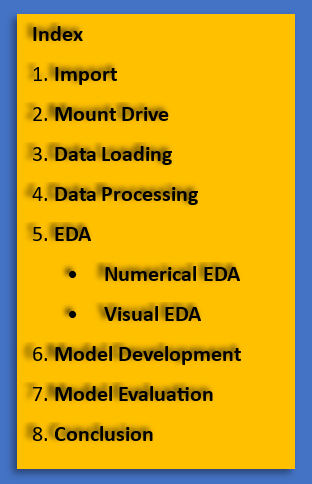

##**Libraries Import and Installation**

In [50]:
# ==============================================================================
# 1. CORE LIBRARIES FOR DATA HANDLING, PROCESSING & UTILITIES
# ==============================================================================
import pandas as pd
import numpy as np
import os
import warnings
from tabulate import tabulate
import random

# For Google Colab-specific functionalities
from google.colab import drive
warnings.filterwarnings('ignore')


# ==============================================================================
# 2. DATA VISUALIZATION LIBRARIES
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# ==============================================================================
# 3. MACHINE LEARNING: ALGORITHMS, MODELS & PREPROCESSING
# ==============================================================================
# Standard ML preprocessing and utilities from Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight

# Specific machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve)

In [51]:
# Set the option to display all columns (no limit)
pd.set_option('display.max_columns', None)

##**Mount Drive**

In [52]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Data Loading**

###**Forex Pair Loading**

In [53]:
import os
import pandas as pd

# Folder and final column names
folder_path = '/content/drive/MyDrive/Data Science/6. AI and ML/Mid Cource Assessment/OHLC'
column_names = ['DATE', 'TIME', 'open', 'high', 'low', 'close', 'tickvol', 'vol', 'spread']

# File names mapped to variable names
file_map = {
    'AUDNZD.csv': 'audnzd_df',
    'AUDUSD.csv': 'audusd_df',
    'EURJPY.csv': 'eurjpy_df',
    'EURUSD.csv': 'eurusd_df',
    'GBPJPY.csv': 'gbpjpy_df',
    'GBPUSD.csv': 'gbpusd_df',
    'NZDUSD.csv': 'nzdusd_df',
    'USDCAD.csv': 'usdcad_df',
    'USDCHF.csv': 'usdchf_df',
    'USDJPY.csv': 'usdjpy_df'
}

# Temporary dictionary to hold dataframes
temp_dfs = {}

# Load and clean each file into temporary dictionary
for file_name, df_name in file_map.items():
    path = os.path.join(folder_path, file_name)

    raw = pd.read_csv(path, header=None, skiprows=1, names=['raw'])
    split_data = raw['raw'].str.replace('"', '').str.split('\t', expand=True)
    split_data.columns = column_names

    split_data['utc_datetime'] = pd.to_datetime(split_data['DATE'] + ' ' + split_data['TIME'], errors='coerce')
    split_data.dropna(subset=['utc_datetime'], inplace=True)
    split_data.set_index('utc_datetime', inplace=True)
    split_data.drop(['DATE', 'TIME'], axis=1, inplace=True)

    temp_dfs[df_name] = split_data

# Assign each DataFrame to its own variable explicitly
audnzd_df = temp_dfs['audnzd_df']
audusd_df = temp_dfs['audusd_df']
eurjpy_df = temp_dfs['eurjpy_df']
eurusd_df = temp_dfs['eurusd_df']
gbpjpy_df = temp_dfs['gbpjpy_df']
gbpusd_df = temp_dfs['gbpusd_df']
nzdusd_df = temp_dfs['nzdusd_df']
usdcad_df = temp_dfs['usdcad_df']
usdchf_df = temp_dfs['usdchf_df']
usdjpy_df = temp_dfs['usdjpy_df']


In [54]:
print("AUDNZD\n", audnzd_df.head(), "\n")
print("AUDUSD\n", audusd_df.head(), "\n")
print("EURJPY\n", eurjpy_df.head(), "\n")
print("EURUSD\n", eurusd_df.head(), "\n")
print("GBPJPY\n", gbpjpy_df.head(), "\n")
print("GBPUSD\n", gbpusd_df.head(), "\n")
print("NZDUSD\n", nzdusd_df.head(), "\n")
print("USDCAD\n", usdcad_df.head(), "\n")
print("USDCHF\n", usdchf_df.head(), "\n")
print("USDJPY\n", usdjpy_df.head(), "\n")

AUDNZD
                         open     high      low    close tickvol vol spread
utc_datetime                                                              
2025-01-02 00:00:00  1.10494  1.10494  1.10494  1.10494       1   0    279
2025-01-02 00:01:00  1.10534  1.10539  1.10284  1.10368      16   0    200
2025-01-02 00:02:00  1.10482  1.10482  1.10354  1.10412      13   0    200
2025-01-02 00:03:00  1.10412  1.10512  1.10396  1.10396       9   0    200
2025-01-02 00:04:00  1.10408  1.10408  1.10394  1.10408       3   0    400 

AUDUSD
                         open     high      low    close tickvol vol spread
utc_datetime                                                              
2025-01-01 00:00:00  0.61768  0.61768  0.61768  0.61768       1   0    124
2025-01-02 00:00:00  0.61853  0.61853  0.61853  0.61853       1   0     38
2025-01-02 00:01:00  0.61829  0.61853  0.61829  0.61853       8   0     38
2025-01-02 00:02:00  0.61836  0.61836  0.61717  0.61826      11   0     53
2025-01

###**News Data Loading**

In [55]:
# Load the news calendar data
news_df = pd.read_csv('/content/drive/MyDrive/Data Science/6. AI and ML/Mid Cource Assessment/News /calendar_jan_july.csv')

# Display the first few rows and info of the news_df
display(news_df.head())
news_df.info()

,Start,Impact,Currency
0,1/1/2025 5:00,NONE,CAD
1,1/1/2025 5:00,NONE,USD
2,1/1/2025 12:00,NONE,NZD
3,1/1/2025 16:00,NONE,CNY
4,1/1/2025 22:00,LOW,AUD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Start     object
 1   Impact    object
 2   Currency  object
dtypes: object(3)
memory usage: 125.5+ KB


##**Data Processing**

###**Handling Forex Pair's Columns**

In [56]:
# List of dataframes
dfs = [audnzd_df, audusd_df, eurjpy_df, eurusd_df, gbpjpy_df, gbpusd_df, nzdusd_df, usdcad_df, usdchf_df, usdjpy_df]

# Remove 'vol', 'tickvol', and 'spread' columns from each dataframe
for df in dfs:
    columns_to_drop = ['vol', 'tickvol', 'spread']
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)

# Display the first few rows of each modified dataframe to verify
display(audnzd_df.head())
display(audusd_df.head())
display(eurjpy_df.head())
display(eurusd_df.head())
display(gbpjpy_df.head())
display(gbpusd_df.head())
display(nzdusd_df.head())
display(usdcad_df.head())
display(usdchf_df.head())
display(usdjpy_df.head())

,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,1.10494,1.10494,1.10494,1.10494
2025-01-02 00:01:00,1.10534,1.10539,1.10284,1.10368
2025-01-02 00:02:00,1.10482,1.10482,1.10354,1.10412
2025-01-02 00:03:00,1.10412,1.10512,1.10396,1.10396
2025-01-02 00:04:00,1.10408,1.10408,1.10394,1.10408


,open,high,low,close
utc_datetime,,,,
2025-01-01 00:00:00,0.61768,0.61768,0.61768,0.61768
2025-01-02 00:00:00,0.61853,0.61853,0.61853,0.61853
2025-01-02 00:01:00,0.61829,0.61853,0.61829,0.61853
2025-01-02 00:02:00,0.61836,0.61836,0.61717,0.61826
2025-01-02 00:03:00,0.61826,0.61826,0.61810,0.61823


,open,high,low,close
utc_datetime,,,,
2025-01-01 00:00:00,162.459,162.459,162.459,162.459
2025-01-02 00:00:00,162.582,162.634,162.582,162.634
2025-01-02 00:01:00,162.636,162.636,162.582,162.636
2025-01-02 00:02:00,162.636,162.638,162.582,162.638
2025-01-02 00:03:00,162.662,162.670,162.662,162.666


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,1.03515,1.03515,1.03515,1.03515
2025-01-02 00:01:00,1.03498,1.03515,1.03498,1.03515
2025-01-02 00:02:00,1.03510,1.03515,1.03510,1.03515
2025-01-02 00:03:00,1.03513,1.03513,1.03513,1.03513
2025-01-02 00:04:00,1.03508,1.03515,1.03508,1.03515


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:01:00,196.687,196.689,196.660,196.660
2025-01-02 00:02:00,196.660,196.662,196.660,196.662
2025-01-02 00:03:00,196.684,196.715,196.680,196.680
2025-01-02 00:04:00,196.678,196.707,196.614,196.620
2025-01-02 00:05:00,196.646,196.654,196.614,196.642


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,1.25120,1.25120,1.25120,1.25120
2025-01-02 00:01:00,1.25120,1.25124,1.25086,1.25087
2025-01-02 00:02:00,1.25094,1.25094,1.25094,1.25094
2025-01-02 00:03:00,1.25086,1.25086,1.25086,1.25086
2025-01-02 00:04:00,1.25113,1.25113,1.25083,1.25087


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,0.55872,0.55872,0.55872,0.55872
2025-01-02 00:01:00,0.55862,0.55954,0.55819,0.55820
2025-01-02 00:02:00,0.55858,0.55864,0.55828,0.55829
2025-01-02 00:03:00,0.55830,0.55838,0.55830,0.55832
2025-01-02 00:04:00,0.55832,0.55833,0.55832,0.55833


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,1.43750,1.43750,1.43750,1.43750
2025-01-02 00:01:00,1.43766,1.43766,1.43750,1.43750
2025-01-02 00:03:00,1.43752,1.43804,1.43740,1.43804
2025-01-02 00:04:00,1.43754,1.43755,1.43754,1.43755
2025-01-02 00:05:00,1.43760,1.43796,1.43726,1.43768


,open,high,low,close
utc_datetime,,,,
2025-01-02 00:00:00,0.90584,0.90584,0.90584,0.90584
2025-01-02 00:01:00,0.90585,0.90605,0.90580,0.90600
2025-01-02 00:02:00,0.90602,0.90612,0.90601,0.90607
2025-01-02 00:03:00,0.90605,0.90605,0.90605,0.90605
2025-01-02 00:05:00,0.90610,0.90610,0.90550,0.90586


,open,high,low,close
utc_datetime,,,,
2025-01-01 00:00:00,157.059,157.061,157.059,157.061
2025-01-02 00:00:00,157.125,157.138,157.125,157.138
2025-01-02 00:01:00,157.138,157.140,157.138,157.140
2025-01-02 00:02:00,157.152,157.152,157.125,157.126
2025-01-02 00:03:00,157.164,157.182,157.156,157.156


###**Combine All Forex Pairs into single df**

In [57]:
# Combine all dataframes
combined_forex_df = pd.concat(dfs, axis=1)

# Rename columns to distinguish between currency pairs
new_column_names = []
for file_name, df_name in file_map.items():
    currency_pair = file_name.split('.')[0].lower()
    for col in ['open', 'high', 'low', 'close']:
        new_column_names.append(f"{currency_pair}_{col}")

combined_forex_df.columns = new_column_names

# Add 'LNY_session' column
combined_forex_df['LNY_session'] = ((combined_forex_df.index.hour >= 12) & (combined_forex_df.index.hour < 16)).astype(int)

# Reset the index to make 'utc_datetime' a regular column
combined_forex_df = combined_forex_df.reset_index()

# Get the list of columns
cols = combined_forex_df.columns.tolist()

# Remove 'utc_datetime' and 'LNY_session' from their current positions
cols.remove('utc_datetime')
cols.remove('LNY_session')

# Insert 'utc_datetime' and 'LNY_session' at the desired positions
cols.insert(0, 'utc_datetime')
cols.insert(1, 'LNY_session')

# Reindex the dataframe with the new column order
combined_forex_df = combined_forex_df[cols]

# Display the first few rows and info of the modified dataframe
display(combined_forex_df.head())
combined_forex_df.info()

,utc_datetime,LNY_session,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close
0,2025-01-01 00:00:00,0,NaN,NaN,NaN,NaN,0.61768,0.61768,0.61768,0.61768,162.459,162.459,162.459,162.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.059,157.061,157.059,157.061
1,2025-01-02 00:00:00,0,1.10494,1.10494,1.10494,1.10494,0.61853,0.61853,0.61853,0.61853,162.582,162.634,162.582,162.634,1.03515,1.03515,1.03515,1.03515,NaN,NaN,NaN,NaN,1.25120,1.25120,1.25120,1.25120,0.55872,0.55872,0.55872,0.55872,1.43750,1.43750,1.43750,1.43750,0.90584,0.90584,0.90584,0.90584,157.125,157.138,157.125,157.138
2,2025-01-02 00:01:00,0,1.10534,1.10539,1.10284,1.10368,0.61829,0.61853,0.61829,0.61853,162.636,162.636,162.582,162.636,1.03498,1.03515,1.03498,1.03515,196.687,196.689,196.660,196.660,1.25120,1.25124,1.25086,1.25087,0.55862,0.55954,0.55819,0.55820,1.43766,1.43766,1.43750,1.43750,0.90585,0.90605,0.90580,0.90600,157.138,157.140,157.138,157.140
3,2025-01-02 00:02:00,0,1.10482,1.10482,1.10354,1.10412,0.61836,0.61836,0.61717,0.61826,162.636,162.638,162.582,162.638,1.03510,1.03515,1.03510,1.03515,196.660,196.662,196.660,196.662,1.25094,1.25094,1.25094,1.25094,0.55858,0.55864,0.55828,0.55829,NaN,NaN,NaN,NaN,0.90602,0.90612,0.90601,0.90607,157.152,157.152,157.125,157.126
4,2025-01-02 00:03:00,0,1.10412,1.10512,1.10396,1.10396,0.61826,0.61826,0.61810,0.61823,162.662,162.670,162.662,162.666,1.03513,1.03513,1.03513,1.03513,196.684,196.715,196.680,196.680,1.25086,1.25086,1.25086,1.25086,0.55830,0.55838,0.55830,0.55832,1.43752,1.43804,1.43740,1.43804,0.90605,0.90605,0.90605,0.90605,157.164,157.182,157.156,157.156


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215327 entries, 0 to 215326
Data columns (total 42 columns):
 #   Column        Dtype         
---  ------        -----         
 0   utc_datetime  datetime64[ns]
 1   LNY_session   int64         
 2   audnzd_open   object        
 3   audnzd_high   object        
 4   audnzd_low    object        
 5   audnzd_close  object        
 6   audusd_open   object        
 7   audusd_high   object        
 8   audusd_low    object        
 9   audusd_close  object        
 10  eurjpy_open   object        
 11  eurjpy_high   object        
 12  eurjpy_low    object        
 13  eurjpy_close  object        
 14  eurusd_open   object        
 15  eurusd_high   object        
 16  eurusd_low    object        
 17  eurusd_close  object        
 18  gbpjpy_open   object        
 19  gbpjpy_high   object        
 20  gbpjpy_low    object        
 21  gbpjpy_close  object        
 22  gbpusd_open   object        
 23  gbpusd_high   object        
 24  

###**Drop Nulls NaNs**

In [58]:
# Drop rows with any NaN values
combined_forex_df = combined_forex_df.dropna()

# Display the first few rows and info of the cleaned dataframe to verify
display(combined_forex_df.head())
combined_forex_df.info()

,utc_datetime,LNY_session,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close
2,2025-01-02 00:01:00,0,1.10534,1.10539,1.10284,1.10368,0.61829,0.61853,0.61829,0.61853,162.636,162.636,162.582,162.636,1.03498,1.03515,1.03498,1.03515,196.687,196.689,196.660,196.660,1.25120,1.25124,1.25086,1.25087,0.55862,0.55954,0.55819,0.55820,1.43766,1.43766,1.43750,1.43750,0.90585,0.90605,0.90580,0.90600,157.138,157.140,157.138,157.140
4,2025-01-02 00:03:00,0,1.10412,1.10512,1.10396,1.10396,0.61826,0.61826,0.61810,0.61823,162.662,162.670,162.662,162.666,1.03513,1.03513,1.03513,1.03513,196.684,196.715,196.680,196.680,1.25086,1.25086,1.25086,1.25086,0.55830,0.55838,0.55830,0.55832,1.43752,1.43804,1.43740,1.43804,0.90605,0.90605,0.90605,0.90605,157.164,157.182,157.156,157.156
6,2025-01-02 00:05:00,0,1.10508,1.10512,1.10334,1.10334,0.61817,0.61825,0.61810,0.61822,162.660,162.660,162.568,162.570,1.03515,1.03527,1.03515,1.03519,196.646,196.654,196.614,196.642,1.25107,1.25123,1.25082,1.25107,0.55838,0.55904,0.55838,0.55904,1.43760,1.43796,1.43726,1.43768,0.90610,0.90610,0.90550,0.90586,157.163,157.191,157.158,157.164
7,2025-01-02 00:06:00,0,1.10363,1.10363,1.10360,1.10360,0.61817,0.61824,0.61803,0.61803,162.702,162.702,162.652,162.702,1.03519,1.03519,1.03514,1.03517,196.661,196.661,196.618,196.647,1.25109,1.25109,1.25108,1.25108,0.55924,0.55927,0.55904,0.55904,1.43808,1.43808,1.43784,1.43784,0.90549,0.90599,0.90549,0.90593,157.212,157.216,157.193,157.205
8,2025-01-02 00:07:00,0,1.10360,1.10418,1.10360,1.10418,0.61812,0.61820,0.61795,0.61803,162.702,162.702,162.590,162.637,1.03517,1.03517,1.03504,1.03508,196.647,196.658,196.611,196.611,1.25108,1.25108,1.25078,1.25078,0.55900,0.55924,0.55898,0.55922,1.43748,1.43804,1.43747,1.43803,0.90587,0.90593,0.90549,0.90586,157.205,157.205,157.176,157.176


<class 'pandas.core.frame.DataFrame'>
Index: 214742 entries, 2 to 215298
Data columns (total 42 columns):
 #   Column        Dtype         
---  ------        -----         
 0   utc_datetime  datetime64[ns]
 1   LNY_session   int64         
 2   audnzd_open   object        
 3   audnzd_high   object        
 4   audnzd_low    object        
 5   audnzd_close  object        
 6   audusd_open   object        
 7   audusd_high   object        
 8   audusd_low    object        
 9   audusd_close  object        
 10  eurjpy_open   object        
 11  eurjpy_high   object        
 12  eurjpy_low    object        
 13  eurjpy_close  object        
 14  eurusd_open   object        
 15  eurusd_high   object        
 16  eurusd_low    object        
 17  eurusd_close  object        
 18  gbpjpy_open   object        
 19  gbpjpy_high   object        
 20  gbpjpy_low    object        
 21  gbpjpy_close  object        
 22  gbpusd_open   object        
 23  gbpusd_high   object        
 24  gbpus

###**Marking Start as utc_news_time**

In [59]:
# Convert 'Start' column to datetime objects and name it 'utc_news_time'
news_df['utc_news_time'] = pd.to_datetime(news_df['Start'])

# Drop the original 'Start' column
news_df.drop(columns=['Start'], inplace=True)

# Reorder columns to place 'utc_news_time' at the first position
cols = news_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('utc_news_time')))
news_df = news_df[cols]

# Display the first few rows and info of the modified news_df to verify
display(news_df.head())
news_df.info()

,utc_news_time,Impact,Currency
0,2025-01-01 05:00:00,NONE,CAD
1,2025-01-01 05:00:00,NONE,USD
2,2025-01-01 12:00:00,NONE,NZD
3,2025-01-01 16:00:00,NONE,CNY
4,2025-01-01 22:00:00,LOW,AUD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   utc_news_time  datetime64[ns]
 1   Impact         object        
 2   Currency       object        
dtypes: datetime64[ns](1), object(2)
memory usage: 125.5+ KB


###**Assigning Impact Levels to News in Numeric way**

In [60]:
# Extract unique currencies from the file names
currency_pairs = [file.split('.')[0] for file in file_map.keys()]
unique_currencies = sorted(list(set([currency[:3].lower() for currency in currency_pairs] + [currency[3:].lower() for currency in currency_pairs])))

# Create a dictionary to map impact levels to numerical values
impact_map = {'NONE': 0, 'LOW': 1, 'MEDIUM': 2, 'HIGH': 3}

# Filter news_df to keep only news related to the 8 unique currencies
news_df_filtered = news_df[news_df['Currency'].str.lower().isin(unique_currencies)].copy()

# Apply the impact mapping to the filtered news_df and convert to numeric
news_df_filtered['Impact_Numeric'] = news_df_filtered['Impact'].map(impact_map).astype(int)

# Pivot the filtered news_df to create columns for each currency and their numeric impact
news_pivot = news_df_filtered.pivot_table(
    index='utc_news_time',
    columns='Currency',
    values='Impact_Numeric',
    aggfunc='max',  # Use max to get the highest impact if multiple news for a currency at the same time
    fill_value=0    # Fill NaN with 0 for no news
).reset_index()

# Rename all columns: 'utc_news_time' stays as is; currency columns become lowercase with '_news'
news_pivot.columns.name = None
news_pivot.columns = ['utc_news_time'] + [f'{col.lower()}_news' for col in news_pivot.columns[1:]]

# Display the head and info of the modified DataFrame
display(news_pivot.head())
news_pivot.info()


,utc_news_time,aud_news,cad_news,chf_news,eur_news,gbp_news,jpy_news,nzd_news,usd_news
0,2025-01-01 05:00:00,0,0,0,0,0,0,0,0
1,2025-01-01 12:00:00,0,0,0,0,0,0,0,0
2,2025-01-01 22:00:00,1,0,0,0,0,0,0,0
3,2025-01-02 05:30:00,1,0,0,0,0,0,0,0
4,2025-01-02 07:00:00,0,0,0,0,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   utc_news_time  datetime64[ns]
 1   aud_news       int64         
 2   cad_news       int64         
 3   chf_news       int64         
 4   eur_news       int64         
 5   gbp_news       int64         
 6   jpy_news       int64         
 7   nzd_news       int64         
 8   usd_news       int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 168.0 KB


###**Murge News and Forex data into single df by adding new Fundamental Column**

In [61]:
# Merge combined_forex_df with news_pivot
combined_forex_df = pd.merge(combined_forex_df, news_pivot, left_on='utc_datetime', right_on='utc_news_time', how='left')

# Drop the redundant 'utc_news_time' column
combined_forex_df.drop(columns=['utc_news_time'], inplace=True)

# Fill NaN values in the news columns with 0
news_columns = [col for col in news_pivot.columns if col != 'utc_news_time']
combined_forex_df[news_columns] = combined_forex_df[news_columns].fillna(0)

# Convert the filled news columns to integer type
combined_forex_df[news_columns] = combined_forex_df[news_columns].astype(int)

# Get the list of columns
cols = combined_forex_df.columns.tolist()

# Define the news columns to move
news_cols_to_move = ['aud_news', 'cad_news', 'chf_news', 'eur_news', 'gbp_news', 'jpy_news', 'nzd_news', 'usd_news']

# Remove the news columns from their current positions
for col in news_cols_to_move:
    cols.remove(col)

# Insert the news columns after 'LNY_session'
lny_session_index = cols.index('LNY_session')
for i, col in enumerate(news_cols_to_move):
    cols.insert(lny_session_index + 1 + i, col)

# Reindex the dataframe with the new column order
combined_forex_df = combined_forex_df[cols]

# Display the first few rows and info of the merged dataframe to verify
display(combined_forex_df.head())
combined_forex_df.info()

,utc_datetime,LNY_session,aud_news,cad_news,chf_news,eur_news,gbp_news,jpy_news,nzd_news,usd_news,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close
0,2025-01-02 00:01:00,0,0,0,0,0,0,0,0,0,1.10534,1.10539,1.10284,1.10368,0.61829,0.61853,0.61829,0.61853,162.636,162.636,162.582,162.636,1.03498,1.03515,1.03498,1.03515,196.687,196.689,196.660,196.660,1.25120,1.25124,1.25086,1.25087,0.55862,0.55954,0.55819,0.55820,1.43766,1.43766,1.43750,1.43750,0.90585,0.90605,0.90580,0.90600,157.138,157.140,157.138,157.140
1,2025-01-02 00:03:00,0,0,0,0,0,0,0,0,0,1.10412,1.10512,1.10396,1.10396,0.61826,0.61826,0.61810,0.61823,162.662,162.670,162.662,162.666,1.03513,1.03513,1.03513,1.03513,196.684,196.715,196.680,196.680,1.25086,1.25086,1.25086,1.25086,0.55830,0.55838,0.55830,0.55832,1.43752,1.43804,1.43740,1.43804,0.90605,0.90605,0.90605,0.90605,157.164,157.182,157.156,157.156
2,2025-01-02 00:05:00,0,0,0,0,0,0,0,0,0,1.10508,1.10512,1.10334,1.10334,0.61817,0.61825,0.61810,0.61822,162.660,162.660,162.568,162.570,1.03515,1.03527,1.03515,1.03519,196.646,196.654,196.614,196.642,1.25107,1.25123,1.25082,1.25107,0.55838,0.55904,0.55838,0.55904,1.43760,1.43796,1.43726,1.43768,0.90610,0.90610,0.90550,0.90586,157.163,157.191,157.158,157.164
3,2025-01-02 00:06:00,0,0,0,0,0,0,0,0,0,1.10363,1.10363,1.10360,1.10360,0.61817,0.61824,0.61803,0.61803,162.702,162.702,162.652,162.702,1.03519,1.03519,1.03514,1.03517,196.661,196.661,196.618,196.647,1.25109,1.25109,1.25108,1.25108,0.55924,0.55927,0.55904,0.55904,1.43808,1.43808,1.43784,1.43784,0.90549,0.90599,0.90549,0.90593,157.212,157.216,157.193,157.205
4,2025-01-02 00:07:00,0,0,0,0,0,0,0,0,0,1.10360,1.10418,1.10360,1.10418,0.61812,0.61820,0.61795,0.61803,162.702,162.702,162.590,162.637,1.03517,1.03517,1.03504,1.03508,196.647,196.658,196.611,196.611,1.25108,1.25108,1.25078,1.25078,0.55900,0.55924,0.55898,0.55922,1.43748,1.43804,1.43747,1.43803,0.90587,0.90593,0.90549,0.90586,157.205,157.205,157.176,157.176


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214742 entries, 0 to 214741
Data columns (total 50 columns):
 #   Column        Dtype         
---  ------        -----         
 0   utc_datetime  datetime64[ns]
 1   LNY_session   int64         
 2   aud_news      int64         
 3   cad_news      int64         
 4   chf_news      int64         
 5   eur_news      int64         
 6   gbp_news      int64         
 7   jpy_news      int64         
 8   nzd_news      int64         
 9   usd_news      int64         
 10  audnzd_open   object        
 11  audnzd_high   object        
 12  audnzd_low    object        
 13  audnzd_close  object        
 14  audusd_open   object        
 15  audusd_high   object        
 16  audusd_low    object        
 17  audusd_close  object        
 18  eurjpy_open   object        
 19  eurjpy_high   object        
 20  eurjpy_low    object        
 21  eurjpy_close  object        
 22  eurusd_open   object        
 23  eurusd_high   object        
 24  

###**Adding Technical Indicators**

In [62]:

# Assuming your DataFrame is named combined_forex_df and has been loaded from your original data source.

# Step 1: Define a list of all currency pairs.
forex_pairs = ['audnzd', 'audusd', 'eurjpy', 'eurusd', 'gbpjpy', 'gbpusd', 'nzdusd', 'usdcad', 'usdchf', 'usdjpy']

# Step 2: Convert relevant columns to numeric types.
print("Converting columns to numeric types...")
for pair in forex_pairs:
    for col_type in ['open', 'high', 'low', 'close']:
        col_name = f'{pair}_{col_type}'
        combined_forex_df[col_name] = pd.to_numeric(combined_forex_df[col_name], errors='coerce')

# =================================================================================================
# Step 3: Define the final, corrected functions to calculate the indicators.
# =================================================================================================

def calculate_macd(df, close_col, fast_period=12, slow_period=26, signal_period=9):
    """Calculates MACD, Signal Line, and MACD Histogram."""
    fast_ema = df[close_col].ewm(span=fast_period, adjust=False).mean()
    slow_ema = df[close_col].ewm(span=slow_period, adjust=False).mean()
    macd_line = fast_ema - slow_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    macd_hist = macd_line - signal_line
    return macd_line, signal_line, macd_hist

def calculate_bollinger_bands(df, close_col, window=20, num_std=2):
    """Calculates Bollinger Bands (Middle, Upper, Lower)."""
    rolling_mean = df[close_col].rolling(window=window).mean()
    rolling_std = df[close_col].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return rolling_mean, upper_band, lower_band

def calculate_stochastic_oscillator(df, high_col, low_col, close_col, k_period=14, d_period=3):
    """Calculates Stochastic Oscillator %K and %D."""
    lowest_low = df[low_col].rolling(window=k_period).min()
    highest_high = df[high_col].rolling(window=k_period).max()
    percent_k = ((df[close_col] - lowest_low) / (highest_high - lowest_low)) * 100
    percent_d = percent_k.rolling(window=d_period).mean()
    return percent_k, percent_d

def calculate_rsi(df, close_col, window=14):
    """Calculates the Relative Strength Index (RSI)."""
    delta = df[close_col].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_adx(df, high_col, low_col, close_col, window=14):
    """Calculates the Average Directional Index (ADX), +DI, and -DI."""
    # True Range (TR)
    tr = pd.DataFrame({
        'tr1': df[high_col] - df[low_col],
        'tr2': abs(df[high_col] - df[close_col].shift(1)),
        'tr3': abs(df[low_col] - df[close_col].shift(1))
    }).max(axis=1)

    # Directional Movement (+DM, -DM)
    dm_plus = (df[high_col] - df[high_col].shift(1)).where((df[high_col] - df[high_col].shift(1)) > (df[low_col].shift(1) - df[low_col]), 0).where((df[high_col] - df[high_col].shift(1)) > 0, 0)
    dm_minus = (df[low_col].shift(1) - df[low_col]).where((df[low_col].shift(1) - df[low_col]) > (df[high_col] - df[high_col].shift(1)), 0).where((df[low_col].shift(1) - df[low_col]) > 0, 0)

    # Wilder's Smoothing (a form of EMA)
    alpha = 1 / window

    # Corrected smoothing for initial values
    atr = tr.rolling(window=window).mean()
    dm_plus_smooth = dm_plus.rolling(window=window).mean()
    dm_minus_smooth = dm_minus.rolling(window=window).mean()

    # DI
    di_plus = (dm_plus_smooth / atr) * 100
    di_minus = (dm_minus_smooth / atr) * 100

    # DX and ADX
    dx = abs(di_plus - di_minus) / (di_plus + di_minus) * 100
    adx = dx.rolling(window=window).mean()

    return adx, di_plus, di_minus


# =================================================================================================
# Step 4: Calculate all new columns and store them in a temporary list.
# =================================================================================================

new_columns = []
for pair in forex_pairs:
    print(f"Calculating indicators for {pair.upper()}...")

    high_col = f'{pair}_high'
    low_col = f'{pair}_low'
    close_col = f'{pair}_close'

    # Calculate RSI
    rsi = calculate_rsi(combined_forex_df, close_col)
    new_columns.append(pd.DataFrame({f'{pair}_rsi_14': rsi}))

    # Calculate ADX, +DI, and -DI
    adx, di_plus, di_minus = calculate_adx(combined_forex_df, high_col, low_col, close_col)
    new_columns.append(pd.DataFrame({
        f'{pair}_adx_14': adx,
        f'{pair}_plus_di_14': di_plus,
        f'{pair}_minus_di_14': di_minus
    }))

    # Calculate MACD
    macd, signal, hist = calculate_macd(combined_forex_df, close_col)
    new_columns.append(pd.DataFrame({
        f'{pair}_macd': macd,
        f'{pair}_macd_signal': signal,
        f'{pair}_macd_hist': hist
    }))

    # Calculate Bollinger Bands
    mid_band, upper_band, lower_band = calculate_bollinger_bands(combined_forex_df, close_col)
    new_columns.append(pd.DataFrame({
        f'{pair}_bbands_mid': mid_band,
        f'{pair}_bbands_upper': upper_band,
        f'{pair}_bbands_lower': lower_band
    }))

    # Calculate Stochastic Oscillator
    stoch_k, stoch_d = calculate_stochastic_oscillator(combined_forex_df, high_col, low_col, close_col)
    new_columns.append(pd.DataFrame({
        f'{pair}_stoch_k': stoch_k,
        f'{pair}_stoch_d': stoch_d
    }))

# =================================================================================================
# Step 5: Concatenate all new columns to the main DataFrame in one go.
# =================================================================================================

print("\nConcatenating all new indicator columns to the DataFrame...")
combined_forex_df = pd.concat([combined_forex_df] + new_columns, axis=1)

print("\nAll new columns have been added successfully.")
print("\nUpdated DataFrame Info:")
combined_forex_df.info()

print("\nFinal NaN Check:")
nan_counts = combined_forex_df.isnull().sum()
columns_with_nans = nan_counts[nan_counts > 0]
print("Columns with NaN values and their respective counts:")
print(columns_with_nans)

Converting columns to numeric types...
Calculating indicators for AUDNZD...
Calculating indicators for AUDUSD...
Calculating indicators for EURJPY...
Calculating indicators for EURUSD...
Calculating indicators for GBPJPY...
Calculating indicators for GBPUSD...
Calculating indicators for NZDUSD...
Calculating indicators for USDCAD...
Calculating indicators for USDCHF...
Calculating indicators for USDJPY...

Concatenating all new indicator columns to the DataFrame...

All new columns have been added successfully.

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214742 entries, 0 to 214741
Columns: 170 entries, utc_datetime to usdjpy_stoch_d
dtypes: datetime64[ns](1), float64(160), int64(9)
memory usage: 278.5 MB

Final NaN Check:
Columns with NaN values and their respective counts:
audnzd_rsi_14          16
audnzd_adx_14          26
audnzd_plus_di_14      13
audnzd_minus_di_14     13
audnzd_bbands_mid      19
                       ..
usdjpy_bbands_mid      19
u

In [63]:
combined_forex_df.head(1)

,utc_datetime,LNY_session,aud_news,cad_news,chf_news,eur_news,gbp_news,jpy_news,nzd_news,usd_news,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close,audnzd_rsi_14,audnzd_adx_14,audnzd_plus_di_14,audnzd_minus_di_14,audnzd_macd,audnzd_macd_signal,audnzd_macd_hist,audnzd_bbands_mid,audnzd_bbands_upper,audnzd_bbands_lower,audnzd_stoch_k,audnzd_stoch_d,audusd_rsi_14,audusd_adx_14,audusd_plus_di_14,audusd_minus_di_14,audusd_macd,audusd_macd_signal,audusd_macd_hist,audusd_bbands_mid,audusd_bbands_upper,audusd_bbands_lower,audusd_stoch_k,audusd_stoch_d,eurjpy_rsi_14,eurjpy_adx_14,eurjpy_plus_di_14,eurjpy_minus_di_14,eurjpy_macd,eurjpy_macd_signal,eurjpy_macd_hist,eurjpy_bbands_mid,eurjpy_bbands_upper,eurjpy_bbands_lower,eurjpy_stoch_k,eurjpy_stoch_d,eurusd_rsi_14,eurusd_adx_14,eurusd_plus_di_14,eurusd_minus_di_14,eurusd_macd,eurusd_macd_signal,eurusd_macd_hist,eurusd_bbands_mid,eurusd_bbands_upper,eurusd_bbands_lower,eurusd_stoch_k,eurusd_stoch_d,gbpjpy_rsi_14,gbpjpy_adx_14,gbpjpy_plus_di_14,gbpjpy_minus_di_14,gbpjpy_macd,gbpjpy_macd_signal,gbpjpy_macd_hist,gbpjpy_bbands_mid,gbpjpy_bbands_upper,gbpjpy_bbands_lower,gbpjpy_stoch_k,gbpjpy_stoch_d,gbpusd_rsi_14,gbpusd_adx_14,gbpusd_plus_di_14,gbpusd_minus_di_14,gbpusd_macd,gbpusd_macd_signal,gbpusd_macd_hist,gbpusd_bbands_mid,gbpusd_bbands_upper,gbpusd_bbands_lower,gbpusd_stoch_k,gbpusd_stoch_d,nzdusd_rsi_14,nzdusd_adx_14,nzdusd_plus_di_14,nzdusd_minus_di_14,nzdusd_macd,nzdusd_macd_signal,nzdusd_macd_hist,nzdusd_bbands_mid,nzdusd_bbands_upper,nzdusd_bbands_lower,nzdusd_stoch_k,nzdusd_stoch_d,usdcad_rsi_14,usdcad_adx_14,usdcad_plus_di_14,usdcad_minus_di_14,usdcad_macd,usdcad_macd_signal,usdcad_macd_hist,usdcad_bbands_mid,usdcad_bbands_upper,usdcad_bbands_lower,usdcad_stoch_k,usdcad_stoch_d,usdchf_rsi_14,usdchf_adx_14,usdchf_plus_di_14,usdchf_minus_di_14,usdchf_macd,usdchf_macd_signal,usdchf_macd_hist,usdchf_bbands_mid,usdchf_bbands_upper,usdchf_bbands_lower,usdchf_stoch_k,usdchf_stoch_d,usdjpy_rsi_14,usdjpy_adx_14,usdjpy_plus_di_14,usdjpy_minus_di_14,usdjpy_macd,usdjpy_macd_signal,usdjpy_macd_hist,usdjpy_bbands_mid,usdjpy_bbands_upper,usdjpy_bbands_lower,usdjpy_stoch_k,usdjpy_stoch_d
0,2025-01-02 00:01:00,0,0,0,0,0,0,0,0,0,1.1053,1.1054,1.1028,1.1037,0.6183,0.6185,0.6183,0.6185,162.6360,162.6360,162.5820,162.6360,1.0350,1.0352,1.0350,1.0352,196.6870,196.6890,196.6600,196.6600,1.2512,1.2512,1.2509,1.2509,0.5586,0.5595,0.5582,0.5582,1.4377,1.4377,1.4375,1.4375,0.9059,0.9061,0.9058,0.9060,157.1380,157.1400,157.1380,157.1400,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN


In [64]:
combined_forex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214742 entries, 0 to 214741
Columns: 170 entries, utc_datetime to usdjpy_stoch_d
dtypes: datetime64[ns](1), float64(160), int64(9)
memory usage: 278.5 MB


###**Handling Nulls NaNs**

In [65]:
# Remove all rows with any NaN values
# The `dropna()` function, by default, removes any row that contains a NaN value.
print(f"Original number of rows: {combined_forex_df.shape[0]}")
combined_forex_df = combined_forex_df.dropna()
print(f"Number of rows after removing NaNs: {combined_forex_df.shape[0]}")

# Confirm that there are no more NaN values
print("\nFinal NaN check on the cleaned DataFrame:")
nan_counts_cleaned = combined_forex_df.isnull().sum()
print(nan_counts_cleaned[nan_counts_cleaned > 0])

Original number of rows: 214742
Number of rows after removing NaNs: 214621

Final NaN check on the cleaned DataFrame:
Series([], dtype: int64)


In [66]:
combined_forex_df.head(1)

,utc_datetime,LNY_session,aud_news,cad_news,chf_news,eur_news,gbp_news,jpy_news,nzd_news,usd_news,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close,audnzd_rsi_14,audnzd_adx_14,audnzd_plus_di_14,audnzd_minus_di_14,audnzd_macd,audnzd_macd_signal,audnzd_macd_hist,audnzd_bbands_mid,audnzd_bbands_upper,audnzd_bbands_lower,audnzd_stoch_k,audnzd_stoch_d,audusd_rsi_14,audusd_adx_14,audusd_plus_di_14,audusd_minus_di_14,audusd_macd,audusd_macd_signal,audusd_macd_hist,audusd_bbands_mid,audusd_bbands_upper,audusd_bbands_lower,audusd_stoch_k,audusd_stoch_d,eurjpy_rsi_14,eurjpy_adx_14,eurjpy_plus_di_14,eurjpy_minus_di_14,eurjpy_macd,eurjpy_macd_signal,eurjpy_macd_hist,eurjpy_bbands_mid,eurjpy_bbands_upper,eurjpy_bbands_lower,eurjpy_stoch_k,eurjpy_stoch_d,eurusd_rsi_14,eurusd_adx_14,eurusd_plus_di_14,eurusd_minus_di_14,eurusd_macd,eurusd_macd_signal,eurusd_macd_hist,eurusd_bbands_mid,eurusd_bbands_upper,eurusd_bbands_lower,eurusd_stoch_k,eurusd_stoch_d,gbpjpy_rsi_14,gbpjpy_adx_14,gbpjpy_plus_di_14,gbpjpy_minus_di_14,gbpjpy_macd,gbpjpy_macd_signal,gbpjpy_macd_hist,gbpjpy_bbands_mid,gbpjpy_bbands_upper,gbpjpy_bbands_lower,gbpjpy_stoch_k,gbpjpy_stoch_d,gbpusd_rsi_14,gbpusd_adx_14,gbpusd_plus_di_14,gbpusd_minus_di_14,gbpusd_macd,gbpusd_macd_signal,gbpusd_macd_hist,gbpusd_bbands_mid,gbpusd_bbands_upper,gbpusd_bbands_lower,gbpusd_stoch_k,gbpusd_stoch_d,nzdusd_rsi_14,nzdusd_adx_14,nzdusd_plus_di_14,nzdusd_minus_di_14,nzdusd_macd,nzdusd_macd_signal,nzdusd_macd_hist,nzdusd_bbands_mid,nzdusd_bbands_upper,nzdusd_bbands_lower,nzdusd_stoch_k,nzdusd_stoch_d,usdcad_rsi_14,usdcad_adx_14,usdcad_plus_di_14,usdcad_minus_di_14,usdcad_macd,usdcad_macd_signal,usdcad_macd_hist,usdcad_bbands_mid,usdcad_bbands_upper,usdcad_bbands_lower,usdcad_stoch_k,usdcad_stoch_d,usdchf_rsi_14,usdchf_adx_14,usdchf_plus_di_14,usdchf_minus_di_14,usdchf_macd,usdchf_macd_signal,usdchf_macd_hist,usdchf_bbands_mid,usdchf_bbands_upper,usdchf_bbands_lower,usdchf_stoch_k,usdchf_stoch_d,usdjpy_rsi_14,usdjpy_adx_14,usdjpy_plus_di_14,usdjpy_minus_di_14,usdjpy_macd,usdjpy_macd_signal,usdjpy_macd_hist,usdjpy_bbands_mid,usdjpy_bbands_upper,usdjpy_bbands_lower,usdjpy_stoch_k,usdjpy_stoch_d
26,2025-01-02 00:29:00,0,0,0,0,0,0,0,0,0,1.1036,1.1037,1.1036,1.1037,0.6182,0.6182,0.6182,0.6182,162.8120,162.8160,162.8060,162.8110,1.0353,1.0354,1.0353,1.0354,196.7070,196.7070,196.6970,196.6970,1.2509,1.2511,1.2508,1.2511,0.5592,0.5592,0.5592,0.5592,1.4378,1.4379,1.4378,1.4378,0.9062,0.9063,0.9059,0.9059,157.1650,157.2330,157.1650,157.1810,52.4038,53.4336,35.1429,13.1429,-0.0000,0.0000,-0.0001,1.1039,1.1044,1.1033,10.5263,17.6502,84.3750,76.1728,76.5625,1.5625,-0.0000,-0.0000,0.0000,0.6181,0.6183,0.6179,43.1373,42.5700,79.2135,56.7748,41.2338,5.5195,0.0391,0.0346,0.0045,162.7389,162.8588,162.6191,95.4545,92.7918,87.2340,10.6978,15.7676,9.5436,0.0001,0.0000,0.0000,1.0352,1.0354,1.0350,87.7551,94.1640,81.3953,33.1341,43.1085,6.7449,0.0116,0.0063,0.0053,196.6633,196.7060,196.6206,75.6522,76.5217,50.4587,65.9324,0.2451,28.4314,0.0000,0.0000,-0.0000,1.2510,1.2512,1.2508,100.0000,68.7961,70.0000,37.8377,31.6667,8.3333,0.0002,0.0002,-0.0000,0.5591,0.5593,0.5588,89.1892,92.7928,55.7522,25.4464,30.0254,19.3384,0.0001,0.0001,0.0000,1.4378,1.4382,1.4374,36.8421,38.5965,72.7891,78.0912,61.4458,12.4498,0.0001,0.0001,0.0000,0.9058,0.9067,0.9048,55.8333,73.2437,43.8710,62.5464,6.0000,44.8889,0.0095,0.0138,-0.0043,157.1979,157.2449,157.1509,35.8025,51.8519


###**Adding Currency Strength to df**

In [67]:
# Assuming your DataFrame is named combined_forex_df and has been loaded.
# This code assumes the DataFrame already has the final set of columns after
# the previous data preparation steps (including technical indicators).

# Step 1: Define the list of all currency pairs and the unique currencies.
forex_pairs = ['audnzd', 'audusd', 'eurjpy', 'eurusd', 'gbpjpy', 'gbpusd', 'nzdusd', 'usdcad', 'usdchf', 'usdjpy']
unique_currencies = ['aud', 'nzd', 'eur', 'jpy', 'usd', 'gbp', 'cad', 'chf']

# Step 2: Calculate the log returns for each currency pair.
# This is a robust way to measure price change for strength calculation.
print("Calculating log returns for all currency pairs...")
for pair in forex_pairs:
    close_col = f'{pair}_close'
    # Calculate log return as np.log(current_price / previous_price)
    combined_forex_df[f'{pair}_log_return'] = np.log(combined_forex_df[close_col] / combined_forex_df[close_col].shift(1))

# Step 3: Create a DataFrame to store the raw strength scores for each currency.
# This DataFrame will be used for the ranking.
print("\nCalculating raw strength scores for each currency...")
raw_strength_df = pd.DataFrame(index=combined_forex_df.index)

# Loop through each unique currency to calculate its raw strength
for currency in unique_currencies:
    raw_strength_df[f'{currency}_raw_strength'] = 0.0
    for pair in forex_pairs:
        # Check if the currency is the base or quote
        base = pair[:3]
        quote = pair[3:]
        log_return_col = f'{pair}_log_return'

        if currency == base:
            # If the currency is the base, a positive log return adds to its strength
            raw_strength_df[f'{currency}_raw_strength'] += combined_forex_df[log_return_col]
        elif currency == quote:
            # If the currency is the quote, a positive log return means the base is strong, so we subtract it
            raw_strength_df[f'{currency}_raw_strength'] -= combined_forex_df[log_return_col]

# Step 4: Rank the raw strength scores and assign a 1-6 scale.
# We will create a new DataFrame to hold the final strength scores.
strength_columns = []
for index, row in raw_strength_df.iterrows():
    # Sort the currencies by their raw strength in descending order
    sorted_currencies = row.sort_values(ascending=False)

    # Create a mapping from rank (1-8) to strength score (1-6)
    rank_mapping = {
        0: 6,  # Rank 1 (strongest) -> Strength 6
        1: 5,  # Rank 2 -> Strength 5
        2: 4,  # Rank 3 -> Strength 4
        3: 3,  # Rank 4 -> Strength 3
        4: 3,  # Rank 5 -> Strength 3
        5: 2,  # Rank 6 -> Strength 2
        6: 2,  # Rank 7 -> Strength 2
        7: 1,  # Rank 8 (weakest) -> Strength 1
    }

    # Create a dictionary for this row's strength scores
    row_strength_scores = {}
    for rank, (currency_name, _) in enumerate(sorted_currencies.items()):
        # The currency_name from the raw_strength_df is like 'aud_raw_strength'
        clean_currency_name = currency_name.split('_')[0]
        score_column_name = f'{clean_currency_name}_strength'
        row_strength_scores[score_column_name] = rank_mapping.get(rank, 1) # Default to 1 if rank is out of range

    strength_columns.append(row_strength_scores)

# Convert the list of dictionaries to a DataFrame
currency_strength_df = pd.DataFrame(strength_columns, index=combined_forex_df.index)

# Step 5: Concatenate the new strength columns to the main DataFrame.
print("\nConcatenating currency strength columns to the DataFrame...")
combined_forex_df = pd.concat([combined_forex_df, currency_strength_df], axis=1)

# Clean up the intermediate log return columns if not needed
log_return_cols = [f'{pair}_log_return' for pair in forex_pairs]
combined_forex_df = combined_forex_df.drop(columns=log_return_cols)

print("\nCurrency strength columns have been added successfully.")
print("\nFinal NaN Check:")
nan_counts = combined_forex_df.isnull().sum()
columns_with_nans = nan_counts[nan_counts > 0]
print("Columns with NaN values and their respective counts:")
print(columns_with_nans)

# Note: You will have NaNs in the first row due to log returns.
# You can run .dropna() again if your final model requires a completely clean dataset.
# The code below will drop the remaining NaN rows.
# combined_forex_df_final = combined_forex_df.dropna()


Calculating log returns for all currency pairs...

Calculating raw strength scores for each currency...

Concatenating currency strength columns to the DataFrame...

Currency strength columns have been added successfully.

Final NaN Check:
Columns with NaN values and their respective counts:
Series([], dtype: int64)


In [68]:
combined_forex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214621 entries, 26 to 214741
Columns: 178 entries, utc_datetime to chf_strength
dtypes: datetime64[ns](1), float64(160), int64(17)
memory usage: 293.1 MB


In [69]:
combined_forex_df

,utc_datetime,LNY_session,aud_news,cad_news,chf_news,eur_news,gbp_news,jpy_news,nzd_news,usd_news,audnzd_open,audnzd_high,audnzd_low,audnzd_close,audusd_open,audusd_high,audusd_low,audusd_close,eurjpy_open,eurjpy_high,eurjpy_low,eurjpy_close,eurusd_open,eurusd_high,eurusd_low,eurusd_close,gbpjpy_open,gbpjpy_high,gbpjpy_low,gbpjpy_close,gbpusd_open,gbpusd_high,gbpusd_low,gbpusd_close,nzdusd_open,nzdusd_high,nzdusd_low,nzdusd_close,usdcad_open,usdcad_high,usdcad_low,usdcad_close,usdchf_open,usdchf_high,usdchf_low,usdchf_close,usdjpy_open,usdjpy_high,usdjpy_low,usdjpy_close,audnzd_rsi_14,audnzd_adx_14,audnzd_plus_di_14,audnzd_minus_di_14,audnzd_macd,audnzd_macd_signal,audnzd_macd_hist,audnzd_bbands_mid,audnzd_bbands_upper,audnzd_bbands_lower,audnzd_stoch_k,audnzd_stoch_d,audusd_rsi_14,audusd_adx_14,audusd_plus_di_14,audusd_minus_di_14,audusd_macd,audusd_macd_signal,audusd_macd_hist,audusd_bbands_mid,audusd_bbands_upper,audusd_bbands_lower,audusd_stoch_k,audusd_stoch_d,eurjpy_rsi_14,eurjpy_adx_14,eurjpy_plus_di_14,eurjpy_minus_di_14,eurjpy_macd,eurjpy_macd_signal,eurjpy_macd_hist,eurjpy_bbands_mid,eurjpy_bbands_upper,eurjpy_bbands_lower,eurjpy_stoch_k,eurjpy_stoch_d,eurusd_rsi_14,eurusd_adx_14,eurusd_plus_di_14,eurusd_minus_di_14,eurusd_macd,eurusd_macd_signal,eurusd_macd_hist,eurusd_bbands_mid,eurusd_bbands_upper,eurusd_bbands_lower,eurusd_stoch_k,eurusd_stoch_d,gbpjpy_rsi_14,gbpjpy_adx_14,gbpjpy_plus_di_14,gbpjpy_minus_di_14,gbpjpy_macd,gbpjpy_macd_signal,gbpjpy_macd_hist,gbpjpy_bbands_mid,gbpjpy_bbands_upper,gbpjpy_bbands_lower,gbpjpy_stoch_k,gbpjpy_stoch_d,gbpusd_rsi_14,gbpusd_adx_14,gbpusd_plus_di_14,gbpusd_minus_di_14,gbpusd_macd,gbpusd_macd_signal,gbpusd_macd_hist,gbpusd_bbands_mid,gbpusd_bbands_upper,gbpusd_bbands_lower,gbpusd_stoch_k,gbpusd_stoch_d,nzdusd_rsi_14,nzdusd_adx_14,nzdusd_plus_di_14,nzdusd_minus_di_14,nzdusd_macd,nzdusd_macd_signal,nzdusd_macd_hist,nzdusd_bbands_mid,nzdusd_bbands_upper,nzdusd_bbands_lower,nzdusd_stoch_k,nzdusd_stoch_d,usdcad_rsi_14,usdcad_adx_14,usdcad_plus_di_14,usdcad_minus_di_14,usdcad_macd,usdcad_macd_signal,usdcad_macd_hist,usdcad_bbands_mid,usdcad_bbands_upper,usdcad_bbands_lower,usdcad_stoch_k,usdcad_stoch_d,usdchf_rsi_14,usdchf_adx_14,usdchf_plus_di_14,usdchf_minus_di_14,usdchf_macd,usdchf_macd_signal,usdchf_macd_hist,usdchf_bbands_mid,usdchf_bbands_upper,usdchf_bbands_lower,usdchf_stoch_k,usdchf_stoch_d,usdjpy_rsi_14,usdjpy_adx_14,usdjpy_plus_di_14,usdjpy_minus_di_14,usdjpy_macd,usdjpy_macd_signal,usdjpy_macd_hist,usdjpy_bbands_mid,usdjpy_bbands_upper,usdjpy_bbands_lower,usdjpy_stoch_k,usdjpy_stoch_d,aud_strength,nzd_strength,eur_strength,jpy_strength,usd_strength,gbp_strength,cad_strength,chf_strength
26,2025-01-02 00:29:00,0,0,0,0,0,0,0,0,0,1.1036,1.1037,1.1036,1.1037,0.6182,0.6182,0.6182,0.6182,162.8120,162.8160,162.8060,162.8110,1.0353,1.0354,1.0353,1.0354,196.7070,196.7070,196.6970,196.6970,1.2509,1.2511,1.2508,1.2511,0.5592,0.5592,0.5592,0.5592,1.4378,1.4379,1.4378,1.4378,0.9062,0.9063,0.9059,0.9059,157.1650,157.2330,157.1650,157.1810,52.4038,53.4336,35.1429,13.1429,-0.0000,0.0000,-0.0001,1.1039,1.1044,1.1033,10.5263,17.6502,84.3750,76.1728,76.5625,1.5625,-0.0000,-0.0000,0.0000,0.6181,0.6183,0.6179,43.1373,42.5700,79.2135,56.7748,41.2338,5.5195,0.0391,0.0346,0.0045,162.7389,162.8588,162.6191,95.4545,92.7918,87.2340,10.6978,15.7676,9.5436,0.0001,0.0000,0.0000,1.0352,1.0354,1.0350,87.7551,94.1640,81.3953,33.1341,43.1085,6.7449,0.0116,0.0063,0.0053,196.6633,196.7060,196.6206,75.6522,76.5217,50.4587,65.9324,0.2451,28.4314,0.0000,0.0000,-0.0000,1.2510,1.2512,1.2508,100.0000,68.7961,70.0000,37.8377,31.6667,8.3333,0.0002,0.0002,-0.0000,0.5591,0.5593,0.5588,89.1892,92.7928,55.7522,25.4464,30.0254,19.3384,0.0001,0.0001,0.0000,1.4378,1.4382,1.4374,36.8421,38.5965,72.7891,78.0912,61.4458,12.4498,0.0001,0.0001,0.0000,0.9058,0.9067,0.9048,55.8333,73.2437,43.8710,62.5464,6.0000,44.8889,0.0095,0.0138,-0.0043,157.1979,157.2449,157.1509,35.8025,51.8519,6,5,4,3,3,2,2,1
27,2025-01-02 00:30:00,0,0,0

In [70]:
# Check the data types of all columns in the DataFrame
print(combined_forex_df.dtypes)

utc_datetime    datetime64[ns]
LNY_session              int64
aud_news                 int64
cad_news                 int64
chf_news                 int64
                     ...      
jpy_strength             int64
usd_strength             int64
gbp_strength             int64
cad_strength             int64
chf_strength             int64
Length: 178, dtype: object


In [71]:
# Set the option to display up to 350 lines for the info() output
pd.set_option('display.max_info_rows', 350)

# Check the data types and non-null counts of all columns in the DataFrame
print(combined_forex_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 214621 entries, 26 to 214741
Data columns (total 178 columns):
 #    Column               Dtype         
---   ------               -----         
 0    utc_datetime         datetime64[ns]
 1    LNY_session          int64         
 2    aud_news             int64         
 3    cad_news             int64         
 4    chf_news             int64         
 5    eur_news             int64         
 6    gbp_news             int64         
 7    jpy_news             int64         
 8    nzd_news             int64         
 9    usd_news             int64         
 10   audnzd_open          float64       
 11   audnzd_high          float64       
 12   audnzd_low           float64       
 13   audnzd_close         float64       
 14   audusd_open          float64       
 15   audusd_high          float64       
 16   audusd_low           float64       
 17   audusd_close         float64       
 18   eurjpy_open          float64       
 19   eurj

###**Adding Support, Resistance and Candle Pattern**

In [72]:
# --- 1. Define the main function to add all new features ---
def add_technical_features(df, pairs, window=10):
    """
    Adds support, resistance, and an extensive list of candlestick pattern
    columns to the DataFrame for each specified currency pair, modifying the
    DataFrame in-place using a vectorized approach.

    Args:
        df (pd.DataFrame): The input DataFrame with OHLC data for multiple pairs.
        pairs (list): A list of currency pairs (e.g., ['eurusd', 'gbpjpy']).
        window (int): The number of candles to look back for support and resistance.

    Returns:
        list: A list of the new column names that were added.
    """

    # List to store the names of the new columns
    new_columns = []

    for pair in pairs:
        # Define the column names for the current pair
        open_col = f'{pair}_open'
        high_col = f'{pair}_high'
        low_col = f'{pair}_low'
        close_col = f'{pair}_close'

        # --- a. Add Support and Resistance Columns (Vectorized) ---
        # Calculate local support and resistance using a rolling window
        df[f'{pair}_support'] = df[low_col].rolling(window=window).min().shift(1)
        df[f'{pair}_resistance'] = df[high_col].rolling(window=window).max().shift(1)

        # Fill the first few rows with NaNs as the rolling window needs previous data
        df.loc[:window, f'{pair}_support'] = np.nan
        df.loc[:window, f'{pair}_resistance'] = np.nan

        new_columns.extend([f'{pair}_support', f'{pair}_resistance'])

        # --- b. Add Candlestick Pattern Column (Vectorized) ---
        df[f'{pair}_candle_pattern'] = detect_all_patterns_vectorized(df, pair)

        new_columns.append(f'{pair}_candle_pattern')

    return new_columns

# --- 2. Implement the master function for all candlestick patterns (Vectorized) ---
def detect_all_patterns_vectorized(df, pair):
    """
    Vectorized master function to check for multiple candlestick patterns.

    Args:
        df (pd.DataFrame): The full DataFrame.
        pair (str): The currency pair identifier.

    Returns:
        pd.Series: A Series of pattern values for each row.
    """
    # Initialize the pattern series with 0
    pattern_series = pd.Series(np.zeros(len(df)), index=df.index)

    # Get the necessary OHLC data as Series
    open_p = df[f'{pair}_open']
    high_p = df[f'{pair}_high']
    low_p = df[f'{pair}_low']
    close_p = df[f'{pair}_close']

    # Vectorized checks for two and three-candle patterns
    pattern_series[is_bullish_engulfing(open_p, close_p)] = 10
    pattern_series[is_bearish_engulfing(open_p, close_p)] = -10
    pattern_series[is_three_white_soldiers(open_p, close_p)] = 10
    pattern_series[is_three_black_crows(open_p, close_p)] = -10
    pattern_series[is_morning_star(open_p, close_p)] = 10
    pattern_series[is_evening_star(open_p, close_p)] = -10

    # Vectorized checks for single-candle patterns
    pattern_series[is_hammer(open_p, high_p, low_p, close_p)] = 5
    pattern_series[is_inverted_hammer(open_p, high_p, low_p, close_p)] = 5
    pattern_series[is_shooting_star(open_p, high_p, low_p, close_p)] = -5
    pattern_series[is_hanging_man(open_p, high_p, low_p, close_p)] = -5
    # Doji and Spinning Top are not explicitly set here as they are 0 by default.

    return pattern_series

# --- 3. Implement individual candlestick pattern detection functions (Vectorized) ---
# Helper function to check if a candle is bullish (vectorized)
def is_bullish(open_p, close_p):
    return close_p > open_p

# Helper function to check if a candle is bearish (vectorized)
def is_bearish(open_p, close_p):
    return close_p < open_p

# Bullish Hammer (vectorized)
def is_hammer(open_p, high, low, close_p):
    body_size = abs(close_p - open_p)
    full_range = high - low

    # Avoid division by zero
    is_valid = full_range != 0

    lower_shadow = np.minimum(open_p, close_p) - low
    upper_shadow = high - np.maximum(open_p, close_p)

    return is_valid & (body_size < full_range * 0.3) & (lower_shadow > 2 * body_size) & (upper_shadow < body_size)

# Bearish Shooting Star (vectorized)
def is_shooting_star(open_p, high, low, close_p):
    body_size = abs(close_p - open_p)
    full_range = high - low

    # Avoid division by zero
    is_valid = full_range != 0

    lower_shadow = np.minimum(open_p, close_p) - low
    upper_shadow = high - np.maximum(open_p, close_p)

    return is_valid & (body_size < full_range * 0.3) & (upper_shadow > 2 * body_size) & (lower_shadow < body_size)

# Bullish Engulfing (vectorized)
def is_bullish_engulfing(open_p, close_p):
    prev_open = open_p.shift(1)
    prev_close = close_p.shift(1)

    is_prev_bearish = prev_close < prev_open
    is_curr_bullish = close_p > open_p

    # Current candle's body must engulf the previous candle's body
    body_engulfs = (close_p > prev_open) & (open_p < prev_close)

    return is_prev_bearish & is_curr_bullish & body_engulfs

# Bearish Engulfing (vectorized)
def is_bearish_engulfing(open_p, close_p):
    prev_open = open_p.shift(1)
    prev_close = close_p.shift(1)

    is_prev_bullish = prev_close > prev_open
    is_curr_bearish = close_p < open_p

    # Current candle's body must engulf the previous candle's body
    body_engulfs = (close_p < prev_open) & (open_p > prev_close)

    return is_prev_bullish & is_curr_bearish & body_engulfs

# Three White Soldiers (vectorized)
def is_three_white_soldiers(open_p, close_p):
    # Three consecutive bullish candles
    is_prev_prev_bullish = (close_p.shift(2) > open_p.shift(2))
    is_prev_bullish = (close_p.shift(1) > open_p.shift(1))
    is_curr_bullish = (close_p > open_p)

    return is_prev_prev_bullish & is_prev_bullish & is_curr_bullish

# Three Black Crows (vectorized)
def is_three_black_crows(open_p, close_p):
    # Three consecutive bearish candles
    is_prev_prev_bearish = (close_p.shift(2) < open_p.shift(2))
    is_prev_bearish = (close_p.shift(1) < open_p.shift(1))
    is_curr_bearish = (close_p < open_p)

    return is_prev_prev_bearish & is_prev_bearish & is_curr_bearish

# Morning Star (vectorized, simplified)
def is_morning_star(open_p, close_p):
    # Previous candle is bearish. Current candle is a small body.
    is_prev_bearish = (close_p.shift(1) < open_p.shift(1))
    body_size_prev = abs(close_p.shift(1) - open_p.shift(1))
    body_size_curr = abs(close_p - open_p)

    is_small_body_curr = body_size_curr < body_size_prev * 0.2

    return is_prev_bearish & is_small_body_curr

# Evening Star (vectorized, simplified)
def is_evening_star(open_p, close_p):
    # Previous candle is bullish. Current candle is a small body.
    is_prev_bullish = (close_p.shift(1) > open_p.shift(1))
    body_size_prev = abs(close_p.shift(1) - open_p.shift(1))
    body_size_curr = abs(close_p - open_p)

    is_small_body_curr = body_size_curr < body_size_prev * 0.2

    return is_prev_bullish & is_small_body_curr


# Hanging Man (vectorized) - same shape as hammer
def is_hanging_man(open_p, high, low, close_p):
    return is_hammer(open_p, high, low, close_p)

# Inverted Hammer (vectorized) - same shape as shooting star
def is_inverted_hammer(open_p, high, low, close_p):
    return is_shooting_star(open_p, high, low, close_p)

# Doji (vectorized)
def is_doji(open_p, high, low, close_p):
    body_size = abs(close_p - open_p)
    full_range = high - low
    is_valid = full_range != 0
    return is_valid & (body_size < full_range * 0.1)

# Spinning Top (vectorized)
def is_spinning_top(open_p, high, low, close_p):
    body_size = abs(close_p - open_p)
    full_range = high - low
    is_valid = full_range != 0
    upper_shadow = high - np.maximum(open_p, close_p)
    lower_shadow = np.minimum(open_p, close_p) - low
    return is_valid & (body_size < full_range * 0.3) & (upper_shadow > body_size) & (lower_shadow > body_size)

# --- 4. Execute the script on your DataFrame ---
# Define your pairs list
forex_pairs = ['audnzd', 'audusd', 'eurjpy', 'eurusd', 'gbpjpy', 'gbpusd', 'nzdusd', 'usdcad', 'usdchf', 'usdjpy']

# Call the function to add the new columns
new_cols = add_technical_features(combined_forex_df, forex_pairs)

# Display the first few rows of the modified DataFrame to show the new columns
print("New columns added:", new_cols)
print("\nDataFrame with new features:")
print(combined_forex_df[['utc_datetime'] + new_cols + ['audnzd_open', 'audnzd_close']].head(15).to_string())

# --- 5. Inspect and handle NaN values ---
print("\n--- Checking for NaN values ---")
# Check the number of NaN values in the relevant columns
nan_counts = combined_forex_df[new_cols].isnull().sum()
print("Number of NaN values per new column:")
print(nan_counts.to_string())

# Drop rows with any NaN values from the new columns
combined_forex_df.dropna(subset=new_cols, inplace=True)

# Check the new shape of the DataFrame
print("\n--- After dropping rows with NaN values ---")
print(f"Original DataFrame shape: {combined_forex_df.shape}")
print(f"New DataFrame shape: {combined_forex_df.shape}")

# Display the first few rows of the cleaned DataFrame
print("\nCleaned DataFrame with new features:")
print(combined_forex_df[['utc_datetime'] + new_cols + ['audnzd_open', 'audnzd_close']].head(15).to_string())


New columns added: ['audnzd_support', 'audnzd_resistance', 'audnzd_candle_pattern', 'audusd_support', 'audusd_resistance', 'audusd_candle_pattern', 'eurjpy_support', 'eurjpy_resistance', 'eurjpy_candle_pattern', 'eurusd_support', 'eurusd_resistance', 'eurusd_candle_pattern', 'gbpjpy_support', 'gbpjpy_resistance', 'gbpjpy_candle_pattern', 'gbpusd_support', 'gbpusd_resistance', 'gbpusd_candle_pattern', 'nzdusd_support', 'nzdusd_resistance', 'nzdusd_candle_pattern', 'usdcad_support', 'usdcad_resistance', 'usdcad_candle_pattern', 'usdchf_support', 'usdchf_resistance', 'usdchf_candle_pattern', 'usdjpy_support', 'usdjpy_resistance', 'usdjpy_candle_pattern']

DataFrame with new features:
          utc_datetime  audnzd_support  audnzd_resistance  audnzd_candle_pattern  audusd_support  audusd_resistance  audusd_candle_pattern  eurjpy_support  eurjpy_resistance  eurjpy_candle_pattern  eurusd_support  eurusd_resistance  eurusd_candle_pattern  gbpjpy_support  gbpjpy_resistance  gbpjpy_candle_patte

In [73]:
combined_forex_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214611 entries, 36 to 214741
Columns: 208 entries, utc_datetime to usdjpy_candle_pattern
dtypes: datetime64[ns](1), float64(190), int64(17)
memory usage: 342.2 MB


###**Memory Optimization**

In [74]:

# --- 1. Optimize DataFrame Memory Usage ---
print("\n--- Optimizing DataFrame Memory Usage ---")

# Calculate memory usage before optimization
memory_before = combined_forex_df.memory_usage(deep=True).sum() / (1024**2)
print(f"Memory usage before optimization: {memory_before:.2f} MB")

def optimize_dtypes(df):
    """
    Downcasts numeric columns to more memory-efficient types (e.g., float64 to float32).
    This function modifies the DataFrame in-place and returns it.
    """
    optimized_df = df.copy()
    for col in optimized_df.columns:
        # Check if the column is a numeric type that can be downcast
        if optimized_df[col].dtype == 'float64':
            optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='float')
        elif optimized_df[col].dtype == 'int64':
            optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='integer')
    return optimized_df

# Apply the optimization function
combined_forex_df = optimize_dtypes(combined_forex_df)

# Calculate memory usage after optimization
memory_after = combined_forex_df.memory_usage(deep=True).sum() / (1024**2)
print(f"Memory usage after optimization: {memory_after:.2f} MB")
print(f"Memory reduced by: {(memory_before - memory_after) / memory_before * 100:.2f}%")

# Display the new DataFrame info to show the data type changes
print("\nNew DataFrame Info after Optimization:")
combined_forex_df.info()



--- Optimizing DataFrame Memory Usage ---
Memory usage before optimization: 342.21 MB
Memory usage after optimization: 162.30 MB
Memory reduced by: 52.57%

New DataFrame Info after Optimization:
<class 'pandas.core.frame.DataFrame'>
Index: 214611 entries, 36 to 214741
Columns: 208 entries, utc_datetime to usdjpy_candle_pattern
dtypes: datetime64[ns](1), float32(190), int8(17)
memory usage: 162.3 MB


##**EDA**

###**Numeric Analysis**

In [75]:

class ForexEDA:
    def __init__(self, df):
        self.df = df

    # -------------------- 1. Basic Statistics --------------------
    def describe_statistics(self):
        """Print descriptive statistics for numeric columns."""
        stats = self.df.describe().T
        print("\n[1] Descriptive Statistics:")
        print(tabulate(stats, headers='keys', tablefmt='fancy_grid'))

    def check_missing_values(self):
        """Print missing value counts and percentages."""
        missing = self.df.isnull().sum()
        missing_percent = (missing / len(self.df)) * 100
        result = pd.DataFrame({
            'Missing Count': missing,
            'Missing %': missing_percent.round(2)
        }).query("`Missing Count` > 0").sort_values('Missing %', ascending=False)
        print("\n[2] Missing Values:")
        print(tabulate(result, headers='keys', tablefmt='fancy_grid'))

    # -------------------- 2. Distribution Analysis --------------------
    def value_distribution(self, column):
        """Print frequency distribution of a categorical column."""
        dist = self.df[column].value_counts().to_frame(name='Count')
        dist['Percentage'] = (dist['Count'] / dist['Count'].sum() * 100).round(2)
        print(f"\n[3] Value Distribution for {column}:")
        print(tabulate(dist, headers='keys', tablefmt='fancy_grid'))

    def technical_indicator_distribution(self, column):
        """Print min, max, median, and quantiles for technical indicators."""
        q = self.df[column].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
        summary = {
            'Min': self.df[column].min(),
            'Max': self.df[column].max(),
            'Median': self.df[column].median(),
            '1st Percentile': q.loc[0.01],
            '25th Percentile': q.loc[0.25],
            '50th Percentile': q.loc[0.5],
            '75th Percentile': q.loc[0.75],
            '99th Percentile': q.loc[0.99],
        }
        print(f"\n[4] Technical Indicator Distribution for {column}:")
        print(tabulate([summary], headers='keys', tablefmt='fancy_grid'))

    # -------------------- 3. Trend / Time Series Analysis --------------------
    def rolling_average(self, column, window=14):
        """Compute and show rolling average of a column."""
        rolling = self.df[column].rolling(window=window).mean()
        result = pd.DataFrame({column: self.df[column], f'{column}_MA{window}': rolling}).dropna()
        print(f"\n[5] Rolling Average (Window = {window}) for {column}:")
        print(tabulate(result.tail(5), headers='keys', tablefmt='fancy_grid'))

    def volatility(self, column, window=14):
        """Compute rolling standard deviation (volatility) of a column."""
        vol = self.df[column].rolling(window=window).std()
        result = pd.DataFrame({f'{column}_Volatility_{window}': vol}).dropna()
        print(f"\n[6] Volatility (Rolling Std Dev) for {column}:")
        print(tabulate(result.tail(5), headers='keys', tablefmt='fancy_grid'))

    # -------------------- 4. Correlation --------------------
    def correlation_matrix(self, columns):
        """Print correlation matrix for selected columns."""
        corr = self.df[columns].corr().round(2)
        print(f"\n[7] Correlation Matrix:")
        print(tabulate(corr, headers='keys', tablefmt='fancy_grid'))

    def check_multicollinearity(self, columns, threshold=0.9):
        """List pairs of features with correlation > threshold."""
        corr = self.df[columns].corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        multicollinear = [(col1, col2, upper.loc[col1, col2])
                          for col1 in upper.columns
                          for col2 in upper.columns
                          if col1 != col2 and upper.loc[col1, col2] > threshold]
        print(f"\n[8] Multicollinear Feature Pairs (>{threshold}):")
        if multicollinear:
            df = pd.DataFrame(multicollinear, columns=['Feature 1', 'Feature 2', 'Correlation'])
            print(tabulate(df, headers='keys', tablefmt='fancy_grid'))
        else:
            print("No multicollinearity above threshold.")

    # -------------------- 5. Indicator Validity Check --------------------
    def rsi_divergence_check(self, price_col='close', rsi_col='rsi', window=14):
        """Check for basic RSI divergence condition."""
        price_diff = self.df[price_col].diff()
        rsi_diff = self.df[rsi_col].diff()
        divergence = (price_diff > 0) & (rsi_diff < 0)
        divergence_count = divergence.sum()
        print(f"\n[9] RSI Divergence Detected in {divergence_count} rows.")

    def macd_crossover_signals(self, macd_col='macd', signal_col='macd_signal'):
        """Detect MACD crossovers."""
        prev_macd = self.df[macd_col].shift(1)
        prev_signal = self.df[signal_col].shift(1)
        curr_macd = self.df[macd_col]
        curr_signal = self.df[signal_col]
        buy_signals = (prev_macd < prev_signal) & (curr_macd > curr_signal)
        sell_signals = (prev_macd > prev_signal) & (curr_macd < curr_signal)
        print(f"\n[10] MACD Buy Signals: {buy_signals.sum()}, Sell Signals: {sell_signals.sum()}")

    # -------------------- 6. Pattern Analysis --------------------
    def pattern_frequency(self, pattern_col):
        """Count occurrences of a pattern signal (e.g., bullish engulfing)."""
        freq = self.df[pattern_col].value_counts().rename_axis('Signal').reset_index(name='Count')
        print(f"\n[11] Frequency of Pattern: {pattern_col}")
        print(tabulate(freq, headers='keys', tablefmt='fancy_grid'))

    def pattern_accuracy(self, pattern_col, target_col):
        """Compute how often a pattern led to desired outcome (e.g., profit)."""
        pattern_df = self.df[self.df[pattern_col] != 0]
        total = len(pattern_df)
        correct = pattern_df[pattern_df[pattern_col] == pattern_df[target_col]].shape[0]
        accuracy = (correct / total) * 100 if total else 0
        print(f"\n[12] Accuracy of {pattern_col} predicting {target_col}: {accuracy:.2f}% ({correct}/{total})")

    # -------------------- Usage Examples --------------------
    def example_usage(self):
        self.describe_statistics()
        self.check_missing_values()
        self.value_distribution('pair')  # Update with your pair column
        self.technical_indicator_distribution('rsi')
        self.rolling_average('close')
        self.volatility('close')
        self.correlation_matrix(['rsi', 'macd', 'close'])  # Change as needed
        self.check_multicollinearity(['rsi', 'macd', 'macd_signal'])
        self.rsi_divergence_check()
        self.macd_crossover_signals()
        self.pattern_frequency('bullish_engulfing')
        self.pattern_accuracy('bullish_engulfing', 'buy_signal')  # Replace with your target


####**Numeric Analysis with ForexEDA Class**

This section utilizes the `ForexEDA` class to perform a comprehensive numerical analysis of the combined Forex and news data. The analysis covers basic statistics, data distributions, time-series trends, correlations between features, and checks the validity of technical indicators and patterns.

In [76]:
#Using all methods from the ForexEDA class

# Create an instance of the ForexEDA class using your DataFrame
eda_examples = ForexEDA(combined_forex_df)

# 1. Basic Statistics
print("--- Demonstrating Basic Statistics Methods ---")
eda_examples.describe_statistics()
eda_examples.check_missing_values()

# 2. Distribution Analysis
print("\n--- Demonstrating Distribution Analysis Methods (for UTC 12:00 pm to 04:00 pm)---")
# Assuming 'LNY_session' is a suitable column for value distribution
eda_examples.value_distribution('LNY_session')
# Assuming 'audnzd_rsi_14' is a suitable technical indicator column
eda_examples.technical_indicator_distribution('audnzd_rsi_14')

# 3. Trend / Time Series Analysis
print("\n--- Demonstrating Trend / Time Series Analysis Methods ---")
# Assuming 'audnzd_close' is a suitable column for rolling average and volatility
eda_examples.rolling_average('audnzd_close', window=14)
eda_examples.volatility('audnzd_close', window=14)

# 4. Correlation
print("\n--- Demonstrating Correlation Methods ---")
# Using a few technical indicator columns for correlation matrix and multicollinearity check
correlation_cols = ['audnzd_rsi_14', 'audnzd_macd', 'audnzd_macd_signal', 'audnzd_adx_14']
eda_examples.correlation_matrix(correlation_cols)
eda_examples.check_multicollinearity(correlation_cols, threshold=0.8) # Using a slightly lower threshold for demonstration

# 5. Indicator Validity Check
print("\n--- Demonstrating Indicator Validity Check Methods ---")
# Using AUDNZD for RSI divergence and MACD crossover checks
eda_examples.rsi_divergence_check(price_col='audnzd_close', rsi_col='audnzd_rsi_14', window=14)
eda_examples.macd_crossover_signals(macd_col='audnzd_macd', signal_col='audnzd_macd_signal')

# 6. Pattern Analysis
print("\n--- Demonstrating Pattern Analysis Methods ---")
# Assuming 'audnzd_candle_pattern' is a pattern column
eda_examples.pattern_frequency('audnzd_candle_pattern')
# Note: 'pattern_accuracy' requires a 'target_col'. You'll need to define
# a target column (e.g., a binary column indicating profit/loss) in your DataFrame
# to use this method effectively. This example will not be run without a target.
# print("\n--- Demonstrating Pattern Accuracy Method ---")
# eda_examples.pattern_accuracy('audnzd_candle_pattern', 'your_target_column_name') # Replace 'your_target_column_name'

--- Demonstrating Basic Statistics Methods ---

[1] Descriptive Statistics:
╒═══════════════════════╤═════════╤═══════════════════════════════╤════════════════════════╤═════════════════════════╤═════════════════════════╤════════════════════════╤═══════════════════════╤═══════════════╕
│                       │   count │ mean                          │ min                    │ 25%                     │ 50%                     │ 75%                    │ max                   │           std │
╞═══════════════════════╪═════════╪═══════════════════════════════╪════════════════════════╪═════════════════════════╪═════════════════════════╪════════════════════════╪═══════════════════════╪═══════════════╡
│ utc_datetime          │  214611 │ 2025-04-17 07:47:50.559291392 │ 2025-01-02 00:39:00    │ 2025-02-24 12:08:30     │ 2025-04-16 23:39:00     │ 2025-06-09 12:23:30    │ 2025-07-31 13:59:00   │ nan           │
├───────────────────────┼─────────┼───────────────────────────────┼─────────────────

####**Technical and statistical characteristics**

In [77]:


# from the previous steps. We'll use the 'forex_pairs' list.
forex_pairs = ['audnzd', 'audusd', 'eurjpy', 'eurusd', 'gbpjpy', 'gbpusd', 'nzdusd', 'usdcad', 'usdchf', 'usdjpy']

# Set display options for pandas to ensure tables are fully visible
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format) # Set float display precision

print("--- Exploratory Data Analysis: Tabular Summaries ---")

# --- 1. Candlestick Pattern Frequency Across All Pairs ---
print("\n1. Candlestick Pattern Frequency Across All Pairs:")
# Melt the DataFrame to analyze all patterns in a single series
pattern_columns = [f'{pair}_candle_pattern' for pair in forex_pairs]
all_patterns = combined_forex_df[pattern_columns].melt(var_name='pair', value_name='pattern_code')

# Map pattern codes to their names for better readability
pattern_map = {
    0.0: 'No Pattern',
    5.0: 'Bullish (Hammer/Inverted Hammer)',
    -5.0: 'Bearish (Shooting Star/Hanging Man)',
    10.0: 'Strong Bullish (Engulfing/Soldiers/Star)',
    -10.0: 'Strong Bearish (Engulfing/Crows/Star)'
}
all_patterns['pattern_name'] = all_patterns['pattern_code'].map(pattern_map)
print(all_patterns['pattern_name'].value_counts().to_string())

# --- 2. Average Support and Resistance Levels per Pair ---
print("\n2. Average Support and Resistance Levels per Pair:")
avg_levels_data = []
for pair in forex_pairs:
    avg_support = combined_forex_df[f'{pair}_support'].mean()
    avg_resistance = combined_forex_df[f'{pair}_resistance'].mean()
    avg_levels_data.append([pair, avg_support, avg_resistance])
avg_levels_df = pd.DataFrame(avg_levels_data, columns=['Pair', 'Avg Support', 'Avg Resistance'])
print(avg_levels_df.to_string(index=False))

# --- 3. Candlestick Pattern Frequency per Pair ---
print("\n3. Candlestick Pattern Frequency per Pair:")
for pair in forex_pairs:
    print(f"\n--- {pair.upper()} Patterns ---")
    pair_patterns = combined_forex_df[f'{pair}_candle_pattern'].map(pattern_map)
    print(pair_patterns.value_counts().to_string())

# --- 4. Correlation Matrix of Close Prices ---
print("\n4. Correlation Matrix of Close Prices:")
close_price_cols = [f'{pair}_close' for pair in forex_pairs]
correlation_matrix = combined_forex_df[close_price_cols].corr()
print(correlation_matrix.round(4).to_string())

# --- 5. Descriptive Statistics for each pair's close price ---
print("\n5. Descriptive Statistics for All Pairs' Close Prices:")
all_close_prices_df = combined_forex_df[close_price_cols]
print(all_close_prices_df.describe().round(4).to_string())

# --- 6. Correlation between Candlestick Patterns and a sample pair's price change ---
print("\n6. Correlation between EURUSD Candlestick Patterns and Price Change:")
# Calculate the price change for EURUSD
eurusd_price_change = combined_forex_df['eurusd_close'].diff()

# Calculate the correlation between pattern code and price change
pattern_corr = combined_forex_df['eurusd_candle_pattern'].corr(eurusd_price_change)
print(f"Correlation between EURUSD pattern code and subsequent price change: {pattern_corr:.4f}")

--- Exploratory Data Analysis: Tabular Summaries ---

1. Candlestick Pattern Frequency Across All Pairs:
pattern_name
No Pattern                                  1236347
Strong Bullish (Engulfing/Soldiers/Star)     364820
Strong Bearish (Engulfing/Crows/Star)        360088
Bearish (Shooting Star/Hanging Man)          184855

2. Average Support and Resistance Levels per Pair:
  Pair  Avg Support  Avg Resistance
audnzd       1.0919          1.0923
audusd       0.6369          0.6374
eurjpy     163.4623        163.5787
eurusd       1.1043          1.1050
gbpjpy     193.2365        193.3818
gbpusd       1.3052          1.3060
nzdusd       0.5832          0.5836
usdcad       1.4030          1.4037
usdchf       0.8524          0.8529
usdjpy     148.1429        148.2544

3. Candlestick Pattern Frequency per Pair:

--- AUDNZD Patterns ---
audnzd_candle_pattern
No Pattern                                  128271
Strong Bullish (Engulfing/Soldiers/Star)     34510
Strong Bearish (Engulfing/Crows/S

###**Visual Analysis**

####**Total News Count by Currency during LNY Session**

In [78]:

# Filter data for LNY session
lny_session_df = combined_forex_df[combined_forex_df['LNY_session'] == 1].copy()

# Calculate total news count for each currency during LNY session
lny_news_counts = lny_session_df[['aud_news', 'cad_news', 'chf_news', 'eur_news', 'gbp_news', 'jpy_news', 'nzd_news', 'usd_news']].sum().reset_index()
lny_news_counts.columns = ['Currency', 'News_Count']

# Sort by news count for better visualization (optional for interactive, but good practice)
lny_news_counts = lny_news_counts.sort_values('News_Count', ascending=False)

# Create an interactive bar chart using Plotly Express
fig = px.bar(lny_news_counts,
             x='Currency',
             y='News_Count',
             title='Total News Count by Currency during LNY Session (12:00 PM - 4:00 PM UTC)',
             labels={'Currency': 'Currency', 'News_Count': 'Number of News Occurrences'},
             color='Currency', # Color bars by currency
             hover_data={'Currency': True, 'News_Count': True}, # Show details on hover
             text='News_Count') # Add text labels on top of bars

fig.update_layout(xaxis_tickangle=-45)
fig.show()

####**Proportion of News Occurrences by Currency (All Sessions)**

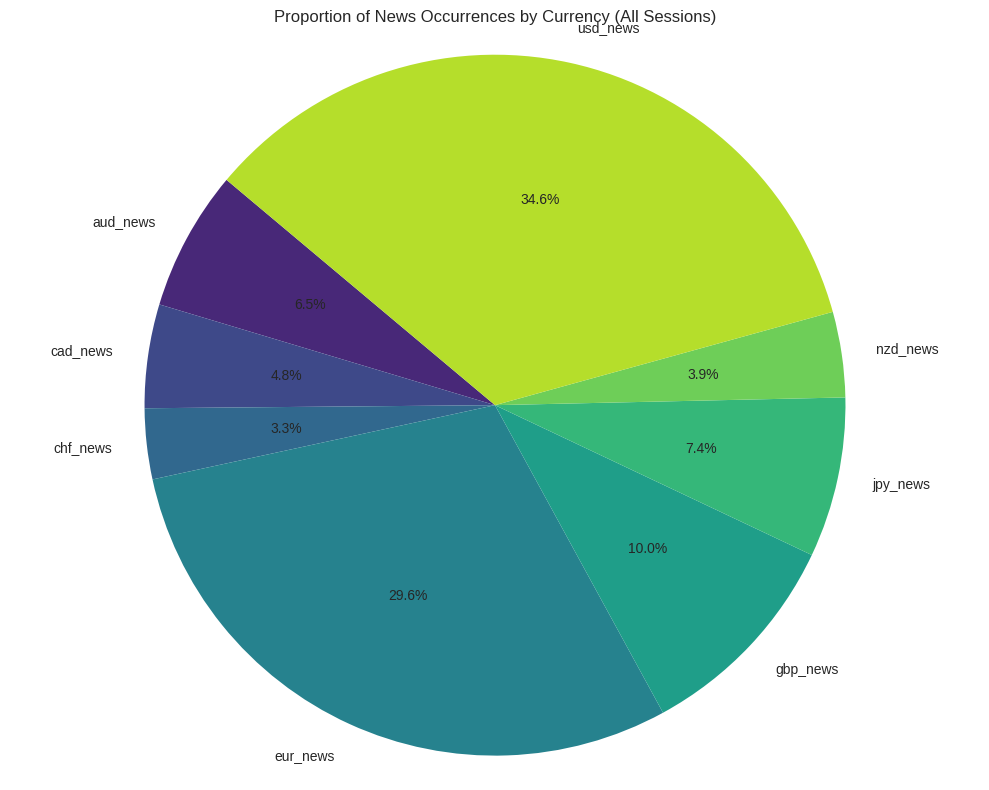

In [79]:
# Calculate total news count for each currency across the entire dataset
total_news_counts = combined_forex_df[['aud_news', 'cad_news', 'chf_news', 'eur_news', 'gbp_news', 'jpy_news', 'nzd_news', 'usd_news']].sum().reset_index()
total_news_counts.columns = ['Currency', 'News_Count']

# Filter out currencies with zero news for better visualization
total_news_counts = total_news_counts[total_news_counts['News_Count'] > 0]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_news_counts['News_Count'], labels=total_news_counts['Currency'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(total_news_counts)))
plt.title('Proportion of News Occurrences by Currency (All Sessions)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

####**Volatile pairs Near Weekends**

In [80]:


# Filter data for Mondays and Fridays
weekend_influence_df = combined_forex_df[combined_forex_df['utc_datetime'].dt.dayofweek.isin([0, 4])].copy() # Monday is 0, Friday is 4

# Calculate average range (High-Low) and average body size (abs(Open-Close)) for each pair on Mondays and Fridays
weekend_volatility_data = []
for pair in forex_pairs:
    high_col = f'{pair}_high'
    low_col = f'{pair}_low'
    open_col = f'{pair}_open'
    close_col = f'{pair}_close'

    # Calculate range and body size for Monday and Friday separately
    monday_df = weekend_influence_df[weekend_influence_df['utc_datetime'].dt.dayofweek == 0]
    friday_df = weekend_influence_df[weekend_influence_df['utc_datetime'].dt.dayofweek == 4]

    avg_range_monday = (monday_df[high_col] - monday_df[low_col]).mean()
    avg_body_size_monday = abs(monday_df[open_col] - monday_df[close_col]).mean()

    avg_range_friday = (friday_df[high_col] - friday_df[low_col]).mean()
    avg_body_size_friday = abs(friday_df[open_col] - friday_df[close_col]).mean()

    weekend_volatility_data.append([pair.upper(), 'Monday', avg_range_monday, avg_body_size_monday])
    weekend_volatility_data.append([pair.upper(), 'Friday', avg_range_friday, avg_body_size_friday])


# Convert to DataFrame for plotting
weekend_volatility_df_plot = pd.DataFrame(weekend_volatility_data, columns=['Currency_Pair', 'Day', 'Average_Range', 'Average_Body_Size'])

# Sort by Average_Range for consistency in plotting order (optional for interactive)
weekend_volatility_df_plot = weekend_volatility_df_plot.sort_values(['Currency_Pair', 'Day'])

# --- Create Interactive Bar Chart for Average Range (Volatility) ---
fig = px.bar(weekend_volatility_df_plot,
             x='Currency_Pair',
             y='Average_Range',
             color='Day', # Color bars by Day (Monday/Friday)
             barmode='group', # Group bars by Currency_Pair
             title='Volatile pairs Near Weekends', # Renamed title
             labels={'Currency_Pair': 'Currency Pair', 'Average_Range': 'Average Range (High-Low)'},
             hover_data={'Currency_Pair': True, 'Day': True, 'Average_Range': ':.6f'}, # Add hover data
             text='Average_Range') # Add text labels on top of bars


fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(texttemplate='%{text:.6f}', textposition='outside') # Format text labels and position them outside the bars
fig.show()

####**Percentage of Time Currency Pairs are Overbought/Oversold (RSI(14))**

In [81]:


# Define overbought and oversold thresholds for RSI
overbought_threshold = 70
oversold_threshold = 30

# Calculate the percentage of time each pair is overbought or oversold
overbought_oversold_data = []
for pair in forex_pairs:
    rsi_col = f'{pair}_rsi_14'

    # Calculate the number of times RSI is above the overbought threshold
    overbought_count = (combined_forex_df[rsi_col] > overbought_threshold).sum()

    # Calculate the number of times RSI is below the oversold threshold
    oversold_count = (combined_forex_df[rsi_col] < oversold_threshold).sum()

    # Calculate the total number of data points for the pair (excluding NaNs in RSI)
    total_count = combined_forex_df[rsi_col].dropna().shape[0]

    # Calculate percentages, handling the case where total_count is zero
    overbought_percentage = (overbought_count / total_count) * 100 if total_count > 0 else 0
    oversold_percentage = (oversold_count / total_count) * 100 if total_count > 0 else 0

    overbought_oversold_data.append([pair.upper(), 'Overbought (%)', overbought_percentage])
    overbought_oversold_data.append([pair.upper(), 'Oversold (%)', oversold_percentage])


# Convert to DataFrame for plotting
overbought_oversold_df_plot = pd.DataFrame(overbought_oversold_data, columns=['Currency_Pair', 'Condition', 'Percentage'])

# Create an interactive grouped bar chart using Plotly Express
fig = px.bar(overbought_oversold_df_plot,
             x='Currency_Pair',
             y='Percentage',
             color='Condition', # Color bars by Condition (Overbought/Oversold)
             barmode='group', # Group bars by Currency_Pair
             title='Percentage of Time Currency Pairs are Overbought/Oversold (RSI(14))',
             labels={'Currency_Pair': 'Currency Pair', 'Percentage': 'Percentage of Time'},
             hover_data={'Currency_Pair': True, 'Condition': True, 'Percentage': ':.2f'}, # Show details on hover
             text='Percentage') # Add percentage text on top of bars

fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside') # Format text as percentage and position outside
fig.show()

####**Average Absolute Price Change around High Impact News Events**

In [82]:


# Filter for high impact news (Impact_Numeric = 3)
high_impact_news = combined_forex_df[combined_forex_df[['aud_news', 'cad_news', 'chf_news', 'eur_news', 'gbp_news', 'jpy_news', 'nzd_news', 'usd_news']].max(axis=1) == 3].copy()

# Define a window around the news event to observe price change (e.g., 5 minutes before to 5 minutes after)
window_minutes = 5

# Calculate price change for each pair around high impact news events
news_reaction_data = []

for index, news_row in high_impact_news.iterrows():
    news_time = news_row['utc_datetime']
    start_window = news_time - pd.Timedelta(minutes=window_minutes)
    end_window = news_time + pd.Timedelta(minutes=window_minutes)

    # Filter combined_forex_df for the window around the news event
    window_data = combined_forex_df[(combined_forex_df['utc_datetime'] >= start_window) & (combined_forex_df['utc_datetime'] <= end_window)].copy()

    if not window_data.empty:
        for pair in forex_pairs:
            close_col = f'{pair}_close'
            # Ensure the close column exists and has numeric data
            if close_col in window_data.columns and pd.api.types.is_numeric_dtype(window_data[close_col]):
                # Calculate the price change from the start to the end of the window
                price_change = window_data[close_col].iloc[-1] - window_data[close_col].iloc[0]
                news_reaction_data.append([news_time, pair.upper(), price_change])
            else:
                print(f"Warning: {close_col} not found or not numeric in window_data.")


# Convert the news reaction data to a DataFrame
news_reaction_df = pd.DataFrame(news_reaction_data, columns=['News_Time', 'Currency_Pair', 'Price_Change'])

# Calculate the average *absolute* price change for each currency pair
average_abs_price_change = news_reaction_df.groupby('Currency_Pair')['Price_Change'].apply(lambda x: abs(x).mean()).reset_index()
average_abs_price_change.columns = ['Currency_Pair', 'Average_Absolute_Price_Change']

# Sort by average absolute price change in descending order
average_abs_price_change = average_abs_price_change.sort_values('Average_Absolute_Price_Change', ascending=False)

# Create an interactive bar chart using Plotly Express
fig = px.bar(average_abs_price_change,
             x='Currency_Pair',
             y='Average_Absolute_Price_Change',
             title=f'Average Absolute Price Change around High Impact News Events ({window_minutes} min window)',
             labels={'Currency_Pair': 'Currency Pair', 'Average_Absolute_Price_Change': 'Average Absolute Price Change'},
             color='Currency_Pair', # Color bars by currency pair
             hover_data={'Currency_Pair': True, 'Average_Absolute_Price_Change': ':.6f'}, # Show details on hover
             text='Average_Absolute_Price_Change') # Add text labels on top of bars

fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(texttemplate='%{text:.6f}', textposition='outside') # Format text and position outside

fig.show()

####**Percentage of Time Currency Strength is Respected by Pair**

In [83]:


# This code assumes that 'combined_forex_df' is already loaded, cleaned, and optimized
# from the previous steps. We'll use the 'forex_pairs' list.
forex_pairs = ['audnzd', 'audusd', 'eurjpy', 'eurusd', 'gbpjpy', 'gbpusd', 'nzdusd', 'usdcad', 'usdchf', 'usdjpy']

# Set display options for pandas to ensure tables are fully visible
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format) # Set float display precision

# Create a copy of the DataFrame to avoid fragmentation warnings
combined_forex_df_copy = combined_forex_df.copy()

# Calculate the price change for each currency pair (e.g., close price difference) efficiently
price_change_cols = []
for pair in forex_pairs:
    col_name = f'{pair}_price_change'
    combined_forex_df_copy[col_name] = combined_forex_df_copy[f'{pair}_close'].diff()
    price_change_cols.append(col_name)

# Determine if the price change is bullish (positive) or bearish (negative) efficiently
price_direction_cols = []
for pair in forex_pairs:
    col_name = f'{pair}_price_direction'
    combined_forex_df_copy[col_name] = np.sign(combined_forex_df_copy[f'{pair}_price_change'])
    price_direction_cols.append(col_name)


# Analyze the relationship between currency strength and price direction
# For each currency pair, compare the strength of the base currency with the strength of the quote currency
strength_respect_data = []

for pair in forex_pairs:
    base_currency = pair[:3]
    quote_currency = pair[3:]

    base_strength_col = f'{base_currency}_strength'
    quote_strength_col = f'{quote_currency}_strength'
    price_direction_col = f'{pair}_price_direction'

    # Ensure the necessary columns exist
    if base_strength_col in combined_forex_df_copy.columns and quote_strength_col in combined_forex_df_copy.columns and price_direction_col in combined_forex_df_copy.columns:
        # Condition for respecting strength:
        # If base strength > quote strength, expect bullish movement (price_direction > 0)
        # If base strength < quote strength, expect bearish movement (price_direction < 0)
        # If base strength == quote strength, direction is less predictable (can ignore or handle separately)

        # Calculate instances where strength difference aligns with price direction
        respecting_strength = combined_forex_df_copy[
            ((combined_forex_df_copy[base_strength_col] > combined_forex_df_copy[quote_strength_col]) & (combined_forex_df_copy[price_direction_col] > 0)) |
            ((combined_forex_df_copy[base_strength_col] < combined_forex_df_copy[quote_strength_col]) & (combined_forex_df_copy[price_direction_col] < 0))
        ].shape[0]

        # Calculate total instances where strength difference is not zero
        total_comparisons = combined_forex_df_copy[combined_forex_df_copy[base_strength_col] != combined_forex_df_copy[quote_strength_col]].shape[0]

        # Calculate the percentage of time strength is respected
        respect_percentage = (respecting_strength / total_comparisons) * 100 if total_comparisons > 0 else 0

        strength_respect_data.append([pair.upper(), respect_percentage, respecting_strength, total_comparisons])
    else:
        print(f"Warning: Strength or price direction columns missing for {pair.upper()}")


# Convert the results to a DataFrame
strength_respect_df = pd.DataFrame(strength_respect_data, columns=['Currency_Pair', 'Strength_Respected (%)', 'Respected_Count', 'Total_Comparisons'])


# Create an interactive pie chart for the percentage of time strength is respected
fig = px.pie(strength_respect_df,
             values='Strength_Respected (%)',
             names='Currency_Pair',
             title='Percentage of Time Currency Strength is Respected by Pair',
             hover_name='Currency_Pair', # Use hover_name for the label
             hover_data={'Strength_Respected (%)': ':.2f'}, # Format percentage in hover data
             labels={'Strength_Respected (%)': 'Percentage', 'Currency_Pair': 'Pair'}) # Update labels for clarity

fig.update_traces(textposition='inside', textinfo='percent+label', hovertemplate='<b>%{label}</b><br>Percentage: %{value:.2f}%<extra></extra>') # Customize hover template

fig.show()

####**Support/Resistance Breakouts by Pair**

In [84]:


# Prepare breakout data
breakout_data = []

for pair in forex_pairs:
    support, resistance, close = f'{pair}_support', f'{pair}_resistance', f'{pair}_close'

    if all(col in combined_forex_df.columns for col in [support, resistance, close]):
        bullish = (combined_forex_df[close] > combined_forex_df[resistance]).sum()
        bearish = (combined_forex_df[close] < combined_forex_df[support]).sum()
        total = bullish + bearish

        if total > 0:
            breakout_data.append({
                'Pair': pair.upper(),
                'Bullish': bullish,
                'Bearish': bearish,
                'Bullish_Pct': 100 * bullish / total,
                'Bearish_Pct': 100 * bearish / total
            })

# Build DataFrame
breakout_df = pd.DataFrame(breakout_data)

# Create grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=breakout_df['Pair'],
    y=breakout_df['Bullish'],
    name='Bullish',
    marker_color='royalblue',
    text=breakout_df['Bullish_Pct'].round(1).astype(str) + '%',
    textposition='inside',
    customdata=breakout_df[['Bullish', 'Bullish_Pct']],
    hovertemplate='%{x}<br>Breakout Type: Bullish<br>Count: %{customdata[0]}<br>Percentage: %{customdata[1]:.2f}%<extra></extra>'
))

fig.add_trace(go.Bar(
    x=breakout_df['Pair'],
    y=breakout_df['Bearish'],
    name='Bearish',
    marker_color='indianred',
    text=breakout_df['Bearish_Pct'].round(1).astype(str) + '%',
    textposition='inside',
    customdata=breakout_df[['Bearish', 'Bearish_Pct']],
    hovertemplate='%{x}<br>Breakout Type: Bearish<br>Count: %{customdata[0]}<br>Percentage: %{customdata[1]:.2f}%<extra></extra>'
))

fig.update_layout(
    barmode='group',
    title='Support/Resistance Breakouts by Pair',
    xaxis_title='Currency Pair',
    yaxis_title='Breakout Count',
    bargap=0.2,
    bargroupgap=0.1,
    height=500
)

fig.show()


####**EURUSD 10 Min Chart With Indicators**

In [85]:


# ========================================
# CHART GENERATION
# ========================================

# Select the currency pair and date range for the chart
selected_pair = 'eurusd'
start_date = '2025-01-02'
end_date = '2025-01-03'

# Filter data for the selected pair within the date range
pair_data = combined_forex_df[combined_forex_df['utc_datetime'].between(start_date, end_date)]

# Resample the 1-minute data to a 10-minute timeframe for the OHLC chart
resampled_data = pair_data.set_index('utc_datetime').resample('10T').agg({
    f'{selected_pair}_open': 'first',
    f'{selected_pair}_high': 'max',
    f'{selected_pair}_low': 'min',
    f'{selected_pair}_close': 'last',
    f'{selected_pair}_rsi_14': 'last',
    f'{selected_pair}_adx_14': 'last',
    f'{selected_pair}_plus_di_14': 'last',
    f'{selected_pair}_minus_di_14': 'last',
    f'{selected_pair}_macd': 'last',
    f'{selected_pair}_macd_signal': 'last',
    f'{selected_pair}_macd_hist': 'last',
    f'{selected_pair}_bbands_mid': 'last',
    f'{selected_pair}_bbands_upper': 'last',
    f'{selected_pair}_bbands_lower': 'last',
    f'{selected_pair}_stoch_k': 'last',
    f'{selected_pair}_stoch_d': 'last',
    f'{selected_pair}_support': 'last',
    f'{selected_pair}_resistance': 'last',
    f'{selected_pair}_candle_pattern': 'last'
}).dropna()

# Create subplots for the different indicator types
fig = make_subplots(rows=5, cols=1, shared_xaxes=True,
                    vertical_spacing=0.02,
                    subplot_titles=(f'{selected_pair.upper()} 10-Min Candlestick and Bollinger Bands',
                                    'RSI(14)', 'MACD', 'ADX(14) and Directional Index', 'Stochastic Oscillator'),
                    row_heights=[0.5, 0.12, 0.12, 0.13, 0.13])

# --- Row 1: Main Chart (Candlesticks and Bollinger Bands) ---
fig.add_trace(go.Candlestick(x=resampled_data.index,
                             open=resampled_data[f'{selected_pair}_open'],
                             high=resampled_data[f'{selected_pair}_high'],
                             low=resampled_data[f'{selected_pair}_low'],
                             close=resampled_data[f'{selected_pair}_close'],
                             name=f'{selected_pair.upper()}'), row=1, col=1)

fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_bbands_upper'],
                         mode='lines', name='BB Upper', line=dict(color='red', width=1)), row=1, col=1)
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_bbands_lower'],
                         mode='lines', name='BB Lower', line=dict(color='green', width=1)), row=1, col=1)

# --- Row 2: RSI ---
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_rsi_14'],
                         mode='lines', name='RSI(14)', line=dict(color='purple', width=2)), row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1, annotation_text="Overbought", annotation_position="top left")
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1, annotation_text="Oversold", annotation_position="bottom left")

# --- Row 3: MACD ---
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_macd'],
                         mode='lines', name='MACD', line=dict(color='blue', width=2)), row=3, col=1)
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_macd_signal'],
                         mode='lines', name='Signal', line=dict(color='orange', width=1)), row=3, col=1)
fig.add_trace(go.Bar(x=resampled_data.index, y=resampled_data[f'{selected_pair}_macd_hist'],
                     name='Histogram', marker_color='gray'), row=3, col=1)
fig.add_hline(y=0, line_dash="dash", line_color="white", row=3, col=1)

# --- Row 4: ADX and DI ---
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_adx_14'],
                         mode='lines', name='ADX', line=dict(color='blue', width=2)), row=4, col=1)
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_plus_di_14'],
                         mode='lines', name='+DI(14)', line=dict(color='green', width=1)), row=4, col=1)
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_minus_di_14'],
                         mode='lines', name='-DI(14)', line=dict(color='red', width=1)), row=4, col=1)

# --- Row 5: Stochastic Oscillator ---
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_stoch_k'],
                         mode='lines', name='%K', line=dict(color='blue', width=2)), row=5, col=1)
fig.add_trace(go.Scatter(x=resampled_data.index, y=resampled_data[f'{selected_pair}_stoch_d'],
                         mode='lines', name='%D', line=dict(color='red', width=1)), row=5, col=1)
fig.add_hline(y=80, line_dash="dash", line_color="red", row=5, col=1, annotation_text="Overbought", annotation_position="top left")
fig.add_hline(y=20, line_dash="dash", line_color="green", row=5, col=1, annotation_text="Oversold", annotation_position="bottom left")

# --- Update global layout settings ---
fig.update_layout(
    title_text=f'{selected_pair.upper()} 10-Minute OHLC and Indicators',
    xaxis_rangeslider_visible=False,
    height=1000,
    template='plotly_dark',
    hovermode='x unified'
)

# Update Y-axes for all subplots
for i in range(1, 6):
    fig.update_yaxes(title_text=fig.layout.annotations[i-1]['text'],
                     row=i, col=1, hoverformat=".5f")

fig.show()

##**MODEL DEVELOPMENT PIPELINE**

###**TARGET CREATION FOR BINARY TRADING**

In [86]:

print("=== FOREX BINARY TRADING ML MODEL ===")
print("Creating targets, training a single model (Random Forest), and evaluating performance...")

# ========================================
# STEP 1: TARGET CREATION FOR BINARY TRADING
# ========================================

def create_trading_targets(df, forex_pairs, lookforward_periods=[5, 10, 15], profit_threshold=0.0001):
    """
    Create binary trading targets for short-term fixed timeframe trades
    """
    df_targets = df.copy()

    for pair in forex_pairs:
        close_col = f'{pair}_close'
        for period in lookforward_periods:
            future_price = df_targets[close_col].shift(-period)
            current_price = df_targets[close_col]
            price_change_pct = (future_price - current_price) / current_price
            target_col = f'{pair}_target_{period}min'
            df_targets[target_col] = np.where(
                price_change_pct >= profit_threshold, 1,
                np.where(price_change_pct <= -profit_threshold, 0, np.nan)
            )
            profit_col = f'{pair}_profit_potential_{period}min'
            df_targets[profit_col] = np.abs(price_change_pct)
    return df_targets

print("Creating trading targets...")
df_with_targets = create_trading_targets(combined_forex_df, forex_pairs,
                                         lookforward_periods=[5, 10, 15],
                                         profit_threshold=0.0001)

=== FOREX BINARY TRADING ML MODEL ===
Creating targets, training a single model (Random Forest), and evaluating performance...
Creating trading targets...


###**Feature Engineering**

In [87]:
# ========================================
# STEP 2: FEATURE ENGINEERING & SELECTION
# ========================================

def prepare_features(df, forex_pairs, target_pair='eurusd', target_period=10):
    """
    Prepare features and targets for ML model
    """
    feature_cols = []
    for pair in forex_pairs:
        feature_cols.extend([
            f'{pair}_rsi_14', f'{pair}_adx_14', f'{pair}_plus_di_14', f'{pair}_minus_di_14',
            f'{pair}_macd', f'{pair}_macd_signal', f'{pair}_macd_hist',
            f'{pair}_bbands_mid', f'{pair}_bbands_upper', f'{pair}_bbands_lower',
            f'{pair}_stoch_k', f'{pair}_stoch_d',
            f'{pair}_support', f'{pair}_resistance', f'{pair}_candle_pattern'
        ])
    strength_cols = ['aud_strength', 'nzd_strength', 'eur_strength', 'jpy_strength',
                     'usd_strength', 'gbp_strength', 'cad_strength', 'chf_strength']
    session_news_cols = ['LNY_session', 'aud_news', 'cad_news', 'chf_news', 'eur_news',
                         'gbp_news', 'jpy_news', 'nzd_news', 'usd_news']
    df['hour'] = df['utc_datetime'].dt.hour
    df['day_of_week'] = df['utc_datetime'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    time_cols = ['hour', 'day_of_week', 'is_weekend']
    all_features = feature_cols + strength_cols + session_news_cols + time_cols
    target_col = f'{target_pair}_target_{target_period}min'
    X = df[all_features].copy()
    y = df[target_col].copy()
    valid_indices = ~y.isna()
    X = X[valid_indices]
    y = y[valid_indices]
    return X, y, all_features

# ========================================
# STEP 3: DATA PREPROCESSING
# ========================================

def preprocess_data(X, y):
    """
    Handle missing values and scale features
    """
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed),
                            columns=X_imputed.columns, index=X_imputed.index)
    return X_scaled, y, imputer, scaler

print("Preparing features and targets...")
X, y, feature_names = prepare_features(df_with_targets, forex_pairs,
                                       target_pair='eurusd', target_period=10)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"Target balance: {y.value_counts(normalize=True).round(3)}")

print("Preprocessing data...")
X_processed, y_processed, imputer, scaler = preprocess_data(X, y)

Preparing features and targets...
Dataset shape: (159484, 170)
Target distribution:
eurusd_target_10min
1.0000    81348
0.0000    78136
Name: count, dtype: int64
Target balance: eurusd_target_10min
1.0000   0.5100
0.0000   0.4900
Name: proportion, dtype: float64
Preprocessing data...


###**Splitting Data for Training & Testing**

In [88]:
# ========================================
# STEP 4: TRAIN-TEST SPLIT
# ========================================

print("Splitting data (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed,
    test_size=0.2,
    random_state=42,
    stratify=y_processed
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution:\n{y_train.value_counts()}")

Splitting data (80/20)...
Training set: 127587 samples
Test set: 31897 samples
Training target distribution:
eurusd_target_10min
1.0000    65078
0.0000    62509
Name: count, dtype: int64


###**RANDOM FOREST TRAINING & EVALUATION**

In [89]:
# ========================================
# STEP 5: RANDOM FOREST TRAINING & EVALUATION
# ========================================

def train_and_evaluate_random_forest(X_train, X_test, y_train, y_test):
    """
    Train a single Random Forest model and evaluate its performance
    """
    class_weights = compute_class_weight('balanced',
                                         classes=np.unique(y_train),
                                         y=y_train)

    print("\n=== RANDOM FOREST TRAINING & EVALUATION ===")

    model_name = 'Random Forest'
    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )

    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    results = {
        'accuracy': accuracy, 'precision': precision, 'recall': recall,
        'f1_score': f1, 'auc_roc': auc_roc, 'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(), 'predictions': y_pred, 'probabilities': y_pred_proba
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    return {model_name: results}, {model_name: model}

results, trained_models = train_and_evaluate_random_forest(X_train, X_test, y_train, y_test)


=== RANDOM FOREST TRAINING & EVALUATION ===

Training Random Forest...
Accuracy: 0.9331
Precision: 0.9337
Recall: 0.9352
F1-Score: 0.9345
AUC-ROC: 0.9801
CV Accuracy: 0.9160 (+/- 0.0012)
Confusion Matrix:
[[14547  1080]
 [ 1054 15216]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     15627
         1.0       0.93      0.94      0.93     16270

    accuracy                           0.93     31897
   macro avg       0.93      0.93      0.93     31897
weighted avg       0.93      0.93      0.93     31897



##**Model Evaluation**


Creating evaluation plots for Random Forest...


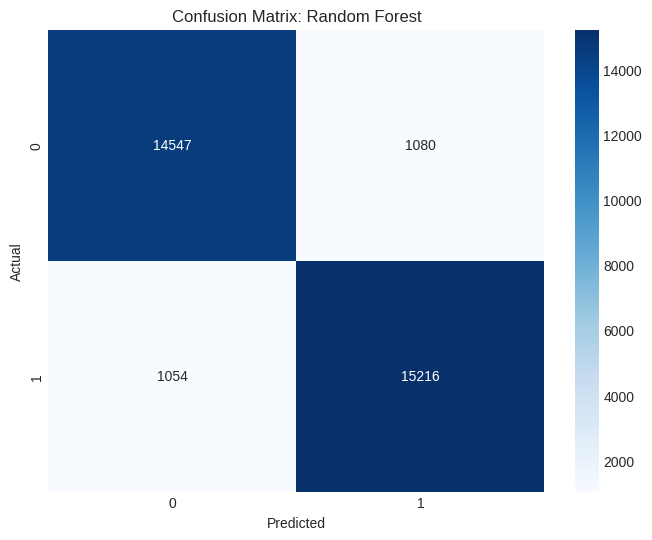

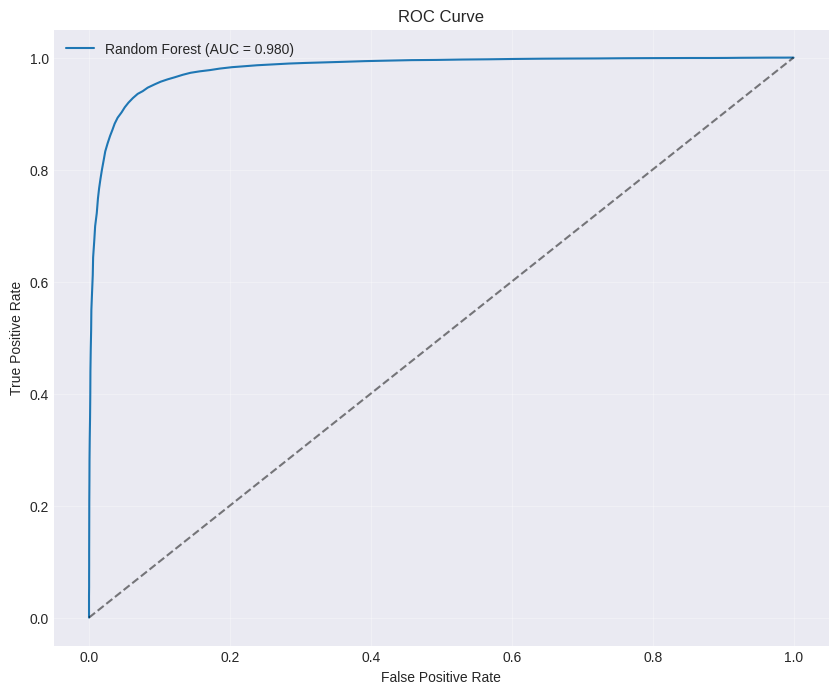


Analyzing feature importance (Random Forest)...


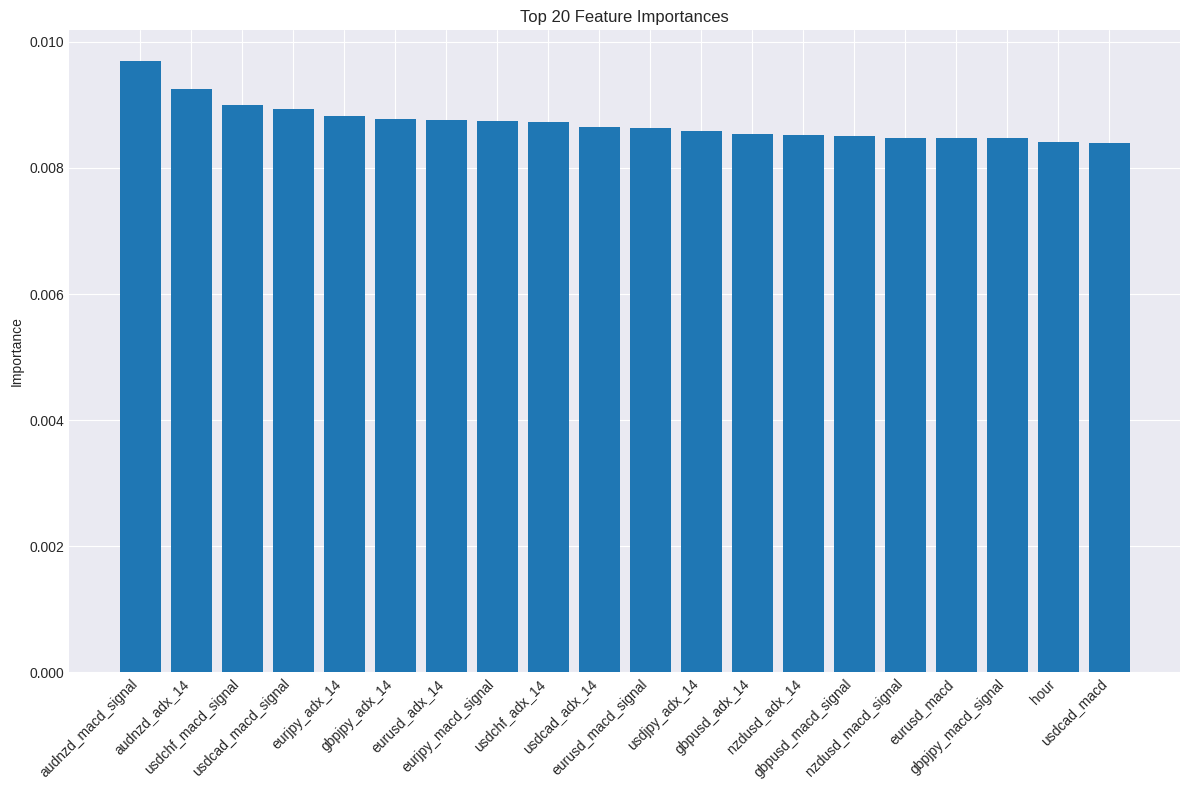


Top 20 Most Important Features:
 1. audnzd_macd_signal             0.0097
 2. audnzd_adx_14                  0.0092
 3. usdchf_macd_signal             0.0090
 4. usdcad_macd_signal             0.0089
 5. eurjpy_adx_14                  0.0088
 6. gbpjpy_adx_14                  0.0088
 7. eurusd_adx_14                  0.0088
 8. eurjpy_macd_signal             0.0087
 9. usdchf_adx_14                  0.0087
10. usdcad_adx_14                  0.0086
11. eurusd_macd_signal             0.0086
12. usdjpy_adx_14                  0.0086
13. gbpusd_adx_14                  0.0085
14. nzdusd_adx_14                  0.0085
15. gbpusd_macd_signal             0.0085
16. nzdusd_macd_signal             0.0085
17. eurusd_macd                    0.0085
18. gbpjpy_macd_signal             0.0085
19. hour                           0.0084
20. usdcad_macd                    0.0084


In [90]:
# ========================================
# STEP 6: ADVANCED EVALUATION & VISUALIZATION
# ========================================

def plot_confusion_matrix(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_test, y_pred_proba, model_name, auc_score):
    plt.figure(figsize=(10, 8))
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def analyze_feature_importance(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(12, 8))
    plt.title(f'Top {top_n} Feature Importances')
    plt.bar(range(top_n), importances[indices])
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()
    print(f"\nTop {top_n} Most Important Features:")
    for i, idx in enumerate(indices):
        print(f"{i+1:2d}. {feature_names[idx]:30s} {importances[idx]:.4f}")

rf_results = results['Random Forest']
rf_model = trained_models['Random Forest']

print("\nCreating evaluation plots for Random Forest...")
plot_confusion_matrix(y_test, rf_results['predictions'], 'Random Forest')
plot_roc_curve(y_test, rf_results['probabilities'], 'Random Forest', rf_results['auc_roc'])

print("\nAnalyzing feature importance (Random Forest)...")
analyze_feature_importance(rf_model, feature_names)

###**Trading Evaluation(Assuming every trade placed by machine)**

####**Performance Simulation: Position-Based Strategy**


=== TRADING PERFORMANCE SIMULATION ===
Initial Capital: $100
Final Capital: $1584.32
Total Return: 1484.32%
Total Trades: 31897
Winning Trades: 29763
Win Rate: 93.31%


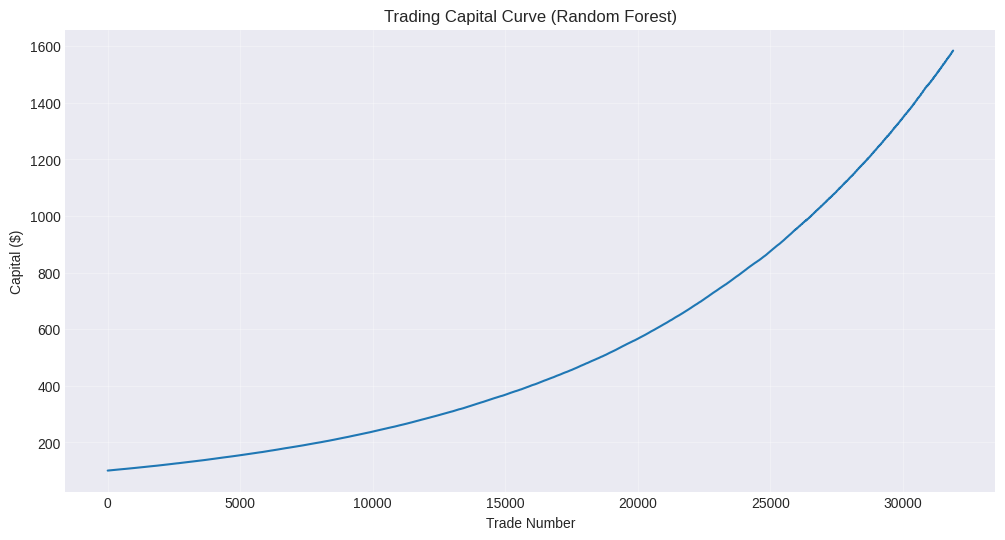

In [91]:
# ========================================
# STEP 7: TRADING PERFORMANCE SIMULATION
# ========================================

def simulate_trading_performance(model, X_test, y_test, initial_capital=100,
                                 risk_per_trade=0.01, profit_target=0.0001):
    """
    Simulate trading performance based on model predictions
    """
    predictions = model.predict(X_test)
    capital = initial_capital
    trades = []

    for i, (pred, actual) in enumerate(zip(predictions, y_test)):
        position_size = capital * risk_per_trade
        if pred == actual:
            profit_loss = position_size * profit_target * 100
            capital += profit_loss
            trades.append({'trade': i, 'prediction': pred, 'actual': actual,
                           'profit_loss': profit_loss, 'capital': capital, 'result': 'win'})
        else:
            profit_loss = -position_size * profit_target * 100
            capital += profit_loss
            trades.append({'trade': i, 'prediction': pred, 'actual': actual,
                           'profit_loss': profit_loss, 'capital': capital, 'result': 'loss'})

    trades_df = pd.DataFrame(trades)
    total_trades = len(trades)
    winning_trades = len(trades_df[trades_df['result'] == 'win'])
    win_rate = winning_trades / total_trades if total_trades > 0 else 0
    total_return = (capital - initial_capital) / initial_capital

    return {
        'final_capital': capital, 'total_return': total_return, 'total_trades': total_trades,
        'winning_trades': winning_trades, 'win_rate': win_rate, 'trades_df': trades_df
    }

print(f"\n=== TRADING PERFORMANCE SIMULATION ===")
trading_results = simulate_trading_performance(rf_model, X_test, y_test)

print(f"Initial Capital: $100")
print(f"Final Capital: ${trading_results['final_capital']:.2f}")
print(f"Total Return: {trading_results['total_return']:.2%}")
print(f"Total Trades: {trading_results['total_trades']}")
print(f"Winning Trades: {trading_results['winning_trades']}")
print(f"Win Rate: {trading_results['win_rate']:.2%}")

plt.figure(figsize=(12, 6))
plt.plot(trading_results['trades_df']['capital'])
plt.title('Trading Capital Curve (Random Forest)')
plt.xlabel('Trade Number')
plt.ylabel('Capital ($)')
plt.grid(True, alpha=0.3)
plt.show()

####**Performance Simulation: Binary Options Strategy**


=== TRADING PERFORMANCE SIMULATION ===
Initial Capital: $100
Final Capital: $18800.10
Total Return: 18700.10%
Total Trades: 31897
Winning Trades: 29763
Win Rate: 93.31%


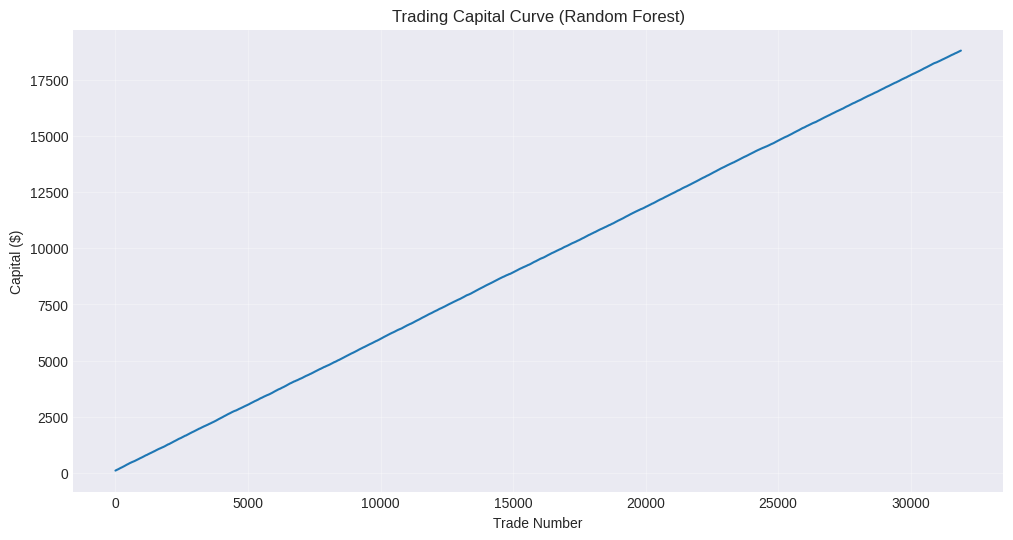

In [92]:
# ========================================
# STEP 7: TRADING PERFORMANCE SIMULATION
# ========================================

def simulate_trading_performance(model, X_test, y_test, initial_capital=100,
                                 trade_size=1, profit_percentage=0.70):
    """
    Simulate binary options trading performance based on model predictions.

    Each trade has a fixed size. A win results in a fixed percentage profit,
    while a loss results in the loss of the entire trade size.

    Parameters:
    - model: The trained ML model
    - X_test: Test features
    - y_test: True labels for the test set
    - initial_capital: Starting account balance
    - trade_size: Fixed amount for each trade
    - profit_percentage: Fixed percentage return on a winning trade
    """
    predictions = model.predict(X_test)
    capital = initial_capital
    trades = []

    # Calculate profit and loss amounts
    profit_per_win = trade_size * profit_percentage
    loss_per_trade = -trade_size

    for i, (pred, actual) in enumerate(zip(predictions, y_test)):
        # Stop trading if capital is depleted
        if capital <= trade_size:
            print("Capital too low to place another trade. Simulation stopped.")
            break

        if pred == actual:
            # Correct prediction: win
            profit_loss = profit_per_win
            capital += profit_loss
            trades.append({'trade': i, 'prediction': pred, 'actual': actual,
                           'profit_loss': profit_loss, 'capital': capital, 'result': 'win'})
        else:
            # Wrong prediction: loss
            profit_loss = loss_per_trade
            capital += profit_loss
            trades.append({'trade': i, 'prediction': pred, 'actual': actual,
                           'profit_loss': profit_loss, 'capital': capital, 'result': 'loss'})

    trades_df = pd.DataFrame(trades)
    total_trades = len(trades)
    winning_trades = len(trades_df[trades_df['result'] == 'win'])
    win_rate = winning_trades / total_trades if total_trades > 0 else 0
    total_return = (capital - initial_capital) / initial_capital

    return {
        'final_capital': capital,
        'total_return': total_return,
        'total_trades': total_trades,
        'winning_trades': winning_trades,
        'win_rate': win_rate,
        'trades_df': trades_df
    }

print(f"\n=== TRADING PERFORMANCE SIMULATION ===")
# Note: Removed risk_per_trade and profit_target as they are no longer relevant
trading_results = simulate_trading_performance(rf_model, X_test, y_test, initial_capital=100)

print(f"Initial Capital: $100")
print(f"Final Capital: ${trading_results['final_capital']:.2f}")
print(f"Total Return: {trading_results['total_return']:.2%}")
print(f"Total Trades: {trading_results['total_trades']}")
print(f"Winning Trades: {trading_results['winning_trades']}")
print(f"Win Rate: {trading_results['win_rate']:.2%}")

plt.figure(figsize=(12, 6))
plt.plot(trading_results['trades_df']['capital'])
plt.title('Trading Capital Curve (Random Forest)')
plt.xlabel('Trade Number')
plt.ylabel('Capital ($)')
plt.grid(True, alpha=0.3)
plt.show()

In [93]:
# ========================================
# STEP 8: FINAL ASSESSMENT
# ========================================

def assess_model_suitability(results, trading_results, min_accuracy=0.55, min_precision=0.55,
                            min_win_rate=0.52, min_return=0.05):
    """
    Assess if the model is suitable for real-world trading
    """
    rf_results = results['Random Forest']

    print(f"\n=== FINAL ASSESSMENT FOR REAL-WORLD USE ===")
    print("Best Model: Random Forest")

    accuracy_ok = rf_results['accuracy'] >= min_accuracy
    precision_ok = rf_results['precision'] >= min_precision
    win_rate_ok = trading_results['win_rate'] >= min_win_rate
    return_ok = trading_results['total_return'] >= min_return

    print(f"\nPerformance Criteria:")
    print(f"✓ Accuracy ≥ {min_accuracy:.0%}: {rf_results['accuracy']:.2%} {'✓' if accuracy_ok else '✗'}")
    print(f"✓ Precision ≥ {min_precision:.0%}: {rf_results['precision']:.2%} {'✓' if precision_ok else '✗'}")
    print(f"✓ Win Rate ≥ {min_win_rate:.0%}: {trading_results['win_rate']:.2%} {'✓' if win_rate_ok else '✗'}")
    print(f"✓ Return ≥ {min_return:.0%}: {trading_results['total_return']:.2%} {'✓' if return_ok else '✗'}")

    overall_suitable = accuracy_ok and precision_ok and win_rate_ok and return_ok

    print(f"\n{'='*50}")
    if overall_suitable:
        print("🟢 RECOMMENDATION: MODEL IS SUITABLE for real-world trading")
        print("The model meets all minimum performance criteria.")
    else:
        print("🔴 RECOMMENDATION: MODEL NEEDS IMPROVEMENT")
        print("The model does not meet minimum performance criteria.")
        print("Consider:")
        print("- Feature engineering improvements")
        print("- Hyperparameter tuning")
        print("- More data collection")
        print("- Different time horizons")

    print(f"{'='*50}")

    return overall_suitable

# Final assessment
suitability = assess_model_suitability(results, trading_results)

# ========================================
# STEP 9: FINAL SUMMARY
# ========================================

print(f"\n=== SUMMARY ===")
print(f"Dataset processed: {X.shape[0]:,} samples with {X.shape[1]} features")
print(f"Model: Random Forest")
print(f"Model suitability: {'SUITABLE' if suitability else 'NEEDS IMPROVEMENT'}")
print(f"Recommended next steps: {'Deploy with risk management' if suitability else 'Improve model performance'}")



=== FINAL ASSESSMENT FOR REAL-WORLD USE ===
Best Model: Random Forest

Performance Criteria:
✓ Accuracy ≥ 55%: 93.31% ✓
✓ Precision ≥ 55%: 93.37% ✓
✓ Win Rate ≥ 52%: 93.31% ✓
✓ Return ≥ 5%: 18700.10% ✓

🟢 RECOMMENDATION: MODEL IS SUITABLE for real-world trading
The model meets all minimum performance criteria.

=== SUMMARY ===
Dataset processed: 159,484 samples with 170 features
Model: Random Forest
Model suitability: SUITABLE
Recommended next steps: Deploy with risk management


###**Sample Trades**

In [94]:
# ========================================
# HOW TO CHECK SAMPLE TRADES & THEIR OUTCOMES
# ========================================

print("\n=== SAMPLE TRADING LOG ===")

# Get the indices from the preprocessed test set
test_indices = X_test.index

# Create a DataFrame to log trades, using the original, unprocessed data
trade_log_df = df_with_targets.loc[test_indices].copy()

# Add the model's predictions to the trade log
trade_log_df['Predicted_Signal'] = rf_results['predictions']

# Filter the log to only include the columns we need for analysis
trade_log_df = trade_log_df[['utc_datetime', 'eurusd_close', 'eurusd_target_10min', 'Predicted_Signal']]

# Rename columns for clarity
trade_log_df.rename(columns={
    'eurusd_close': 'Trade_Open_Price',
    'eurusd_target_10min': 'Actual_Outcome'
}, inplace=True)

# Calculate the close price and datetime after 10 minutes
# Note: We must use the original dataframe to get the shifted values correctly.
original_data_shifted = combined_forex_df.loc[test_indices].copy()
original_data_shifted['Trade_Close_Price'] = combined_forex_df['eurusd_close'].shift(-10)
original_data_shifted['Trade_Close_DateTime'] = combined_forex_df['utc_datetime'].shift(-10)

trade_log_df['Trade_Close_Price'] = original_data_shifted['Trade_Close_Price']
trade_log_df['Trade_Close_DateTime'] = original_data_shifted['Trade_Close_DateTime']

# Determine the result of the trade (Win/Loss)
trade_log_df['Trade_Result'] = np.where(trade_log_df['Predicted_Signal'] == trade_log_df['Actual_Outcome'], 'Win', 'Loss')

# Drop rows where we can't determine the close price (end of the dataset)
trade_log_df.dropna(subset=['Trade_Close_Price'], inplace=True)

# Display a sample of the trade log
print("Displaying a sample of 5 trades from the test set:\n")
print(trade_log_df.head(5).to_string())

print("\n" + "="*80 + "\n")

# Display a sample of winning trades
print("Displaying 3 examples of Winning Trades:\n")
winning_trades = trade_log_df[trade_log_df['Trade_Result'] == 'Win'].head(3)
print(winning_trades[['Trade_Open_Price', 'Trade_Close_Price', 'utc_datetime', 'Trade_Close_DateTime', 'Predicted_Signal', 'Actual_Outcome']].to_string())

print("\n" + "="*80 + "\n")

# Display a sample of losing trades
print("Displaying 3 examples of Losing Trades:\n")
losing_trades = trade_log_df[trade_log_df['Trade_Result'] == 'Loss'].head(3)
print(losing_trades[['Trade_Open_Price', 'Trade_Close_Price', 'utc_datetime', 'Trade_Close_DateTime', 'Predicted_Signal', 'Actual_Outcome']].to_string())


=== SAMPLE TRADING LOG ===
Displaying a sample of 5 trades from the test set:

              utc_datetime  Trade_Open_Price  Actual_Outcome  Predicted_Signal  Trade_Close_Price Trade_Close_DateTime Trade_Result
13595  2025-01-15 14:51:00            1.0296          1.0000            1.0000             1.0301  2025-01-15 15:01:00          Win
102821 2025-04-11 19:51:00            1.1301          1.0000            1.0000             1.1310  2025-04-11 20:01:00          Win
212653 2025-07-30 03:10:00            1.1555          1.0000            1.0000             1.1559  2025-07-30 03:20:00          Win
123416 2025-05-02 04:18:00            1.1285          0.0000            0.0000             1.1283  2025-05-02 04:28:00          Win
141181 2025-05-20 13:19:00            1.1248          0.0000            0.0000             1.1246  2025-05-20 13:29:00          Win


Displaying 3 examples of Winning Trades:

        Trade_Open_Price  Trade_Close_Price        utc_datetime Trade_Close_DateTime

###**Trade Visualization-Line chart(10 Min)**


=== GENERATING TRADE CHART ===


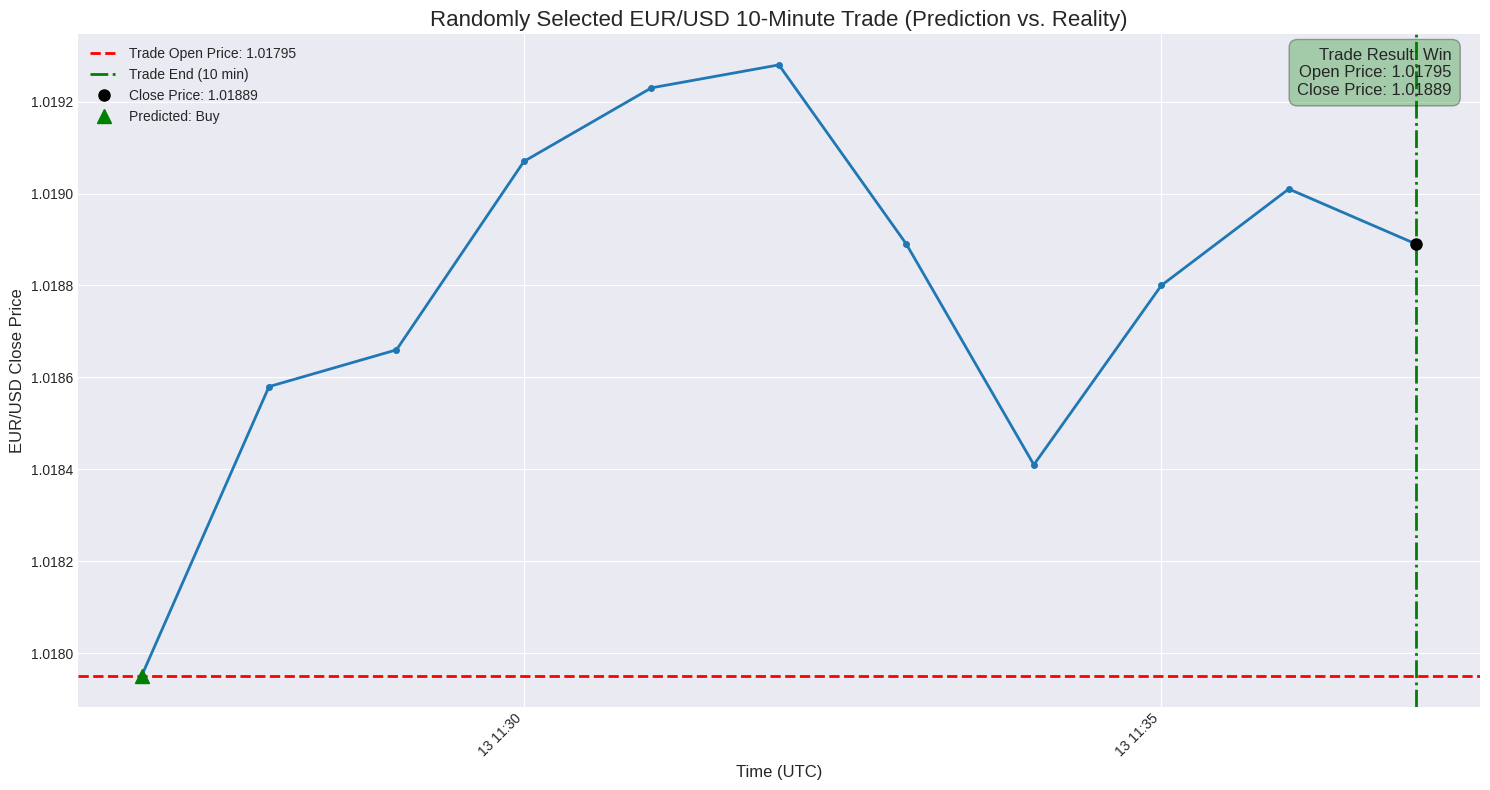


Trade chart successfully generated.


In [95]:
# ========================================
# PLOT: TRADING CHART REPLICATION
# ========================================


print("\n=== GENERATING TRADE CHART ===")

# --- Step 1: Randomly select a single trade from the test set ---
test_indices = X_test.index.to_list()
random_trade_index = random.choice(test_indices)
start_index = combined_forex_df.index.get_loc(random_trade_index)

# --- Step 2: Get the 10-minute price data for the trade ---
# We need 11 data points to show the price at the start and the 10 minutes that follow.
trade_data_points = 11
end_index = start_index + trade_data_points
trade_period = combined_forex_df.iloc[start_index:end_index]
trade_prices = trade_period['eurusd_close'].to_numpy()
trade_times = trade_period['utc_datetime'].to_numpy()

# --- Step 3: Get details for the specific trade ---
trade_log_entry = trade_log_df.loc[random_trade_index]
trade_open_price = trade_log_entry['Trade_Open_Price']
trade_close_price = trade_log_entry['Trade_Close_Price']
trade_start_datetime = trade_log_entry['utc_datetime']
trade_close_datetime = trade_log_entry['Trade_Close_DateTime']
trade_result = trade_log_entry['Trade_Result']
predicted_signal = trade_log_entry['Predicted_Signal']

# --- Step 4: Create the plot ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 8))

# Plot the 10-minute price movement as a line chart
plt.plot(trade_times, trade_prices, marker='o', markersize=4, linestyle='-', color='#1f77b4', linewidth=2)

# Add a horizontal line at the trade's open price
plt.axhline(y=trade_open_price, color='r', linestyle='--', linewidth=2, label=f'Trade Open Price: {trade_open_price:.5f}')

# Add a vertical line at the end of the 10-minute trade
plt.axvline(x=trade_close_datetime, color='g', linestyle='-.', linewidth=2, label='Trade End (10 min)')

# Mark the closing price with a black dot
plt.plot(trade_close_datetime, trade_close_price, 'ko', markersize=8, label=f'Close Price: {trade_close_price:.5f}')

# Add marker for the predicted signal at the trade open time
if predicted_signal == 1:
    plt.plot(trade_start_datetime, trade_open_price, '^', markersize=10, color='green', label='Predicted: Buy')
elif predicted_signal == 0:
    plt.plot(trade_start_datetime, trade_open_price, 'v', markersize=10, color='red', label='Predicted: Sell')

# --- Step 5: Add text and labels for better readability ---
# Define the text for the result box
result_text = f"Trade Result: {trade_result}\n" \
              f"Open Price: {trade_open_price:.5f}\n" \
              f"Close Price: {trade_close_price:.5f}"

# Determine color based on result
result_color = 'green' if trade_result == 'Win' else 'red'

# Add the result text to the top-right corner of the plot
plt.text(0.98, 0.98, result_text, transform=plt.gca().transAxes,
         ha='right', va='top', fontsize=12,
         bbox=dict(facecolor=result_color, alpha=0.3, boxstyle='round,pad=0.5'))

# Format the plot
plt.title(f'Randomly Selected EUR/USD 10-Minute Trade (Prediction vs. Reality)', fontsize=16)
plt.xlabel('Time (UTC)', fontsize=12)
plt.ylabel('EUR/USD Close Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

print("\nTrade chart successfully generated.")

###**Monthly Trades Visual Analysis**

In [96]:
# ========================================
# MONTHLY PERFORMANCE ANALYSIS
# ========================================

print("\n=== ANALYZING MONTHLY TRADING PERFORMANCE ===")

# Ensure 'utc_datetime' is datetime type
trade_log_df['utc_datetime'] = pd.to_datetime(trade_log_df['utc_datetime'])

# Extract month and year
trade_log_df['trade_month'] = trade_log_df['utc_datetime'].dt.to_period('M')

monthly_performance = trade_log_df.groupby('trade_month')['Trade_Result'].value_counts().unstack(fill_value=0)

monthly_performance['Net_Profit_Loss'] = (monthly_performance.get('Win', 0) * 0.70) + (monthly_performance.get('Loss', 0) * -1)

# Convert 'trade_month' to string for Plotly compatibility and reset index
monthly_performance = monthly_performance.reset_index()
monthly_performance['trade_month'] = monthly_performance['trade_month'].astype(str)

print("\nMonthly Trading Performance:")
print(monthly_performance)

# Create an interactive bar chart for monthly performance
fig = px.bar(monthly_performance,
             x='trade_month',
             y='Net_Profit_Loss',
             title='Monthly Net Profit/Loss (Simulated Binary Options)',
             labels={'trade_month': 'Month', 'Net_Profit_Loss': 'Net Profit/Loss ($)'},
             color='Net_Profit_Loss', # Color bars based on profit/loss
             color_continuous_scale='RdYlGn', # Red for loss, Green for profit
             hover_data={'trade_month': True, 'Net_Profit_Loss': ':.2f', 'Win': True, 'Loss': True}, # Show details on hover
             text='Net_Profit_Loss') # Add text labels on top of bars

fig.update_layout(xaxis_tickangle=-45)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format text labels and position them outside the bars

fig.show()


=== ANALYZING MONTHLY TRADING PERFORMANCE ===

Monthly Trading Performance:
Trade_Result trade_month  Loss   Win  Net_Profit_Loss
0                2025-01   271  4333        2762.1000
1                2025-02   240  3851        2455.7000
2                2025-03   330  4157        2579.9000
3                2025-04   370  4716        2931.2000
4                2025-05   344  4544        2836.8000
5                2025-06   305  4113        2574.1000
6                2025-07   274  4049        2560.3000


##**Conclusion**

###**The project addresses the challenge of accurately predicting short-term forex trends for a fixed-duration binary trading strategy. The model's primary objective is to predict both the direction and sustainability of a trend for a fixed 10-minute duration. It achieves this by utilizing a combination of technical and fundamental data to make these predictions. The focus is on the EUR/USD currency pair, serving as a proof-of-concept for a larger strategy. The project's success is measured by a high win rate in a backtesting simulation, prioritizing precision to minimize false-positive signals by running 93% accurate model.**
###**For practical implementation, the final model would be deployed as a predictive API to provide real-time trading signals. A monitoring system would continuously track the model's live performance, and a feedback loop would be established to automatically retrain the model on new data, effectively solving the real-life problem of prediction errors and concept drift over time.**

#**Thankyou**
*   Rijwan Shaikh


